In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report

In [2]:
def preprocess_data(data, target, is_classification=True):
    X_train, X_test, y_train, y_test = train_test_split(
        data, target, test_size=0.3, random_state=42, stratify=target if is_classification else None
    )

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    if is_classification:
        encoder = OneHotEncoder(sparse_output=False)
        y_train = encoder.fit_transform(y_train.reshape(-1, 1))
        y_test = encoder.transform(y_test.reshape(-1, 1))

    return X_train, X_test, y_train, y_test

**RELU**

Iteration 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


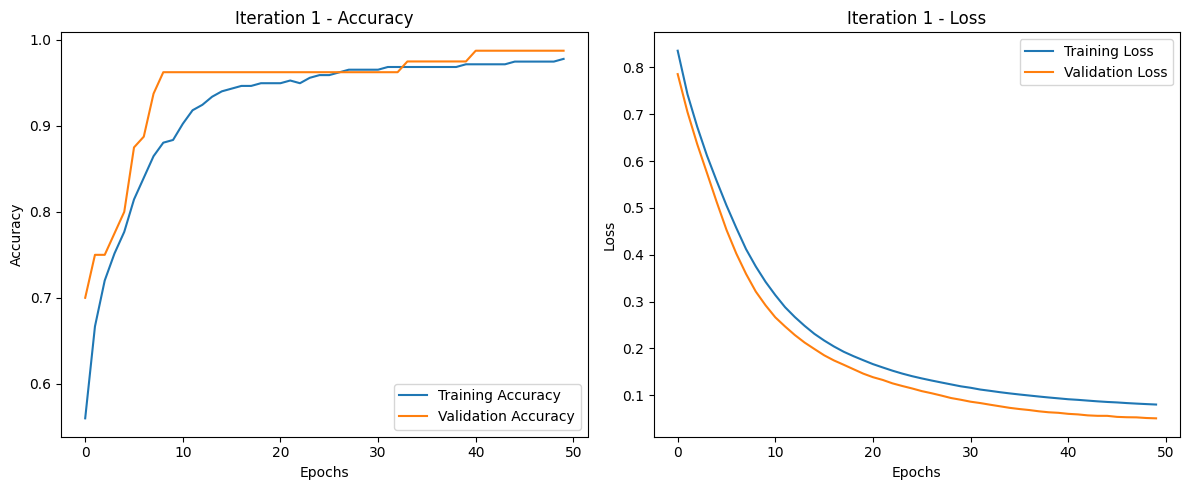

Iteration 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


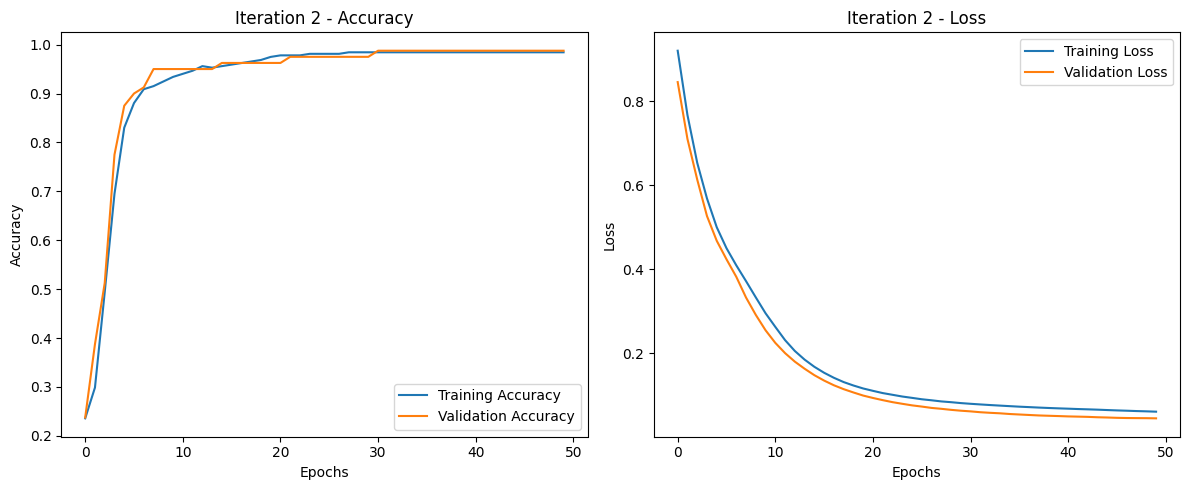

Iteration 3/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


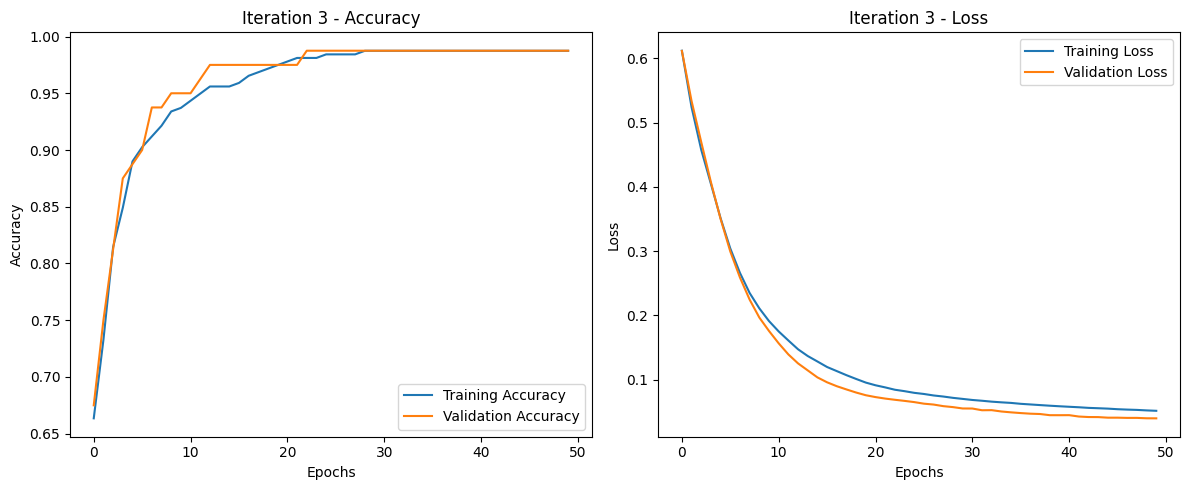


Average Classification Report:
0:
  precision: 0.9534
  recall: 0.9583
  f1-score: 0.9557
  support: 64.0000
1:
  precision: 0.9751
  recall: 0.9720
  f1-score: 0.9735
  support: 107.0000
accuracy: 0.9669
macro avg:
  precision: 0.9642
  recall: 0.9651
  f1-score: 0.9646
  support: 171.0000
weighted avg:
  precision: 0.9670
  recall: 0.9669
  f1-score: 0.9669
  support: 171.0000


In [ ]:
def piecewise_activation(x):
    return tf.where(x > 0, x, tf.zeros_like(x))

class PiecewiseActivation(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PiecewiseActivation, self).__init__(**kwargs)

    def call(self, inputs):
        return piecewise_activation(inputs)

# Load and preprocess the Iris dataset
iris_data = load_breast_cancer()
X_iris, y_iris = iris_data.data, iris_data.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = preprocess_data(X_iris, y_iris)

# Step 3: Build the model
def create_model(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(4, activation=PiecewiseActivation(), input_shape=(input_dim,)),
        tf.keras.layers.Dense(2, activation=PiecewiseActivation()),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and evaluate
def train_and_evaluate(num_iterations=3):
    reports = []
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        model = create_model(X_train_iris.shape[1], y_train_iris.shape[1])
        history = model.fit(
            X_train_iris, y_train_iris, epochs=50, batch_size=16, verbose=0, validation_split=0.2
        )

        # Evaluate
        predictions = model.predict(X_test_iris)
        y_test_labels = np.argmax(y_test_iris, axis=1)
        y_pred_labels = np.argmax(predictions, axis=1)

        # Collect classification report
        report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
        reports.append(report)

        # Plot training and validation accuracy for this iteration
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Iteration {iteration + 1} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training and validation loss for this iteration
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Iteration {iteration + 1} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Average classification report
    avg_report = {}
    for key in reports[0]:
        if isinstance(reports[0][key], dict):  # For class-specific metrics
            avg_report[key] = {
                metric: np.mean([r[key][metric] for r in reports if key in r and metric in r[key]])
                for metric in reports[0][key]
            }
        else:  # For overall metrics (e.g., 'accuracy')
            avg_report[key] = np.mean([r[key] for r in reports if key in r])

    print("\nAverage Classification Report:")
    for key, metrics in avg_report.items():
        if isinstance(metrics, dict):
            print(f"{key}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")
        else:
            print(f"{key}: {metrics:.4f}")

# Run the evaluation
train_and_evaluate()

Iteration 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


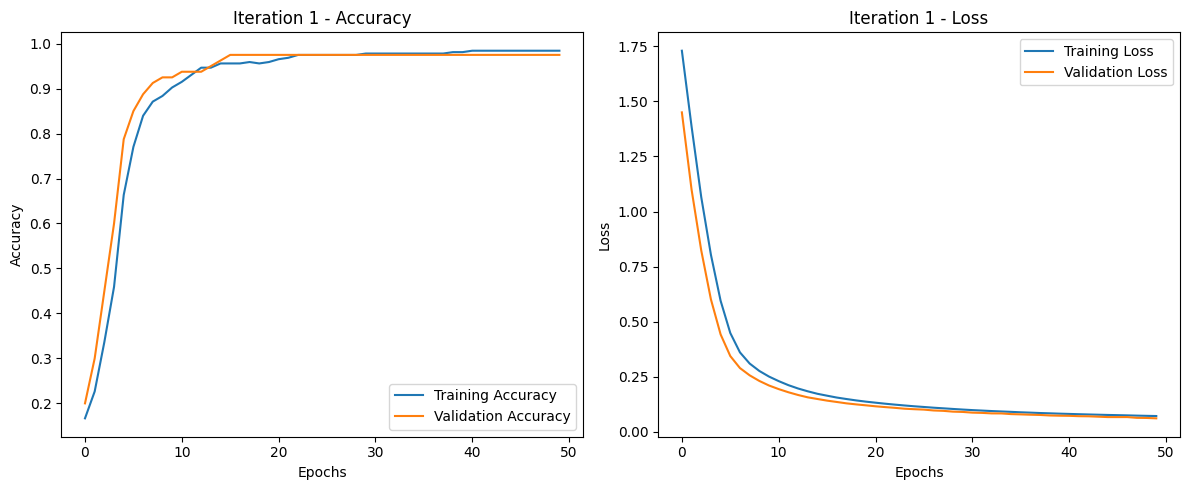

Iteration 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


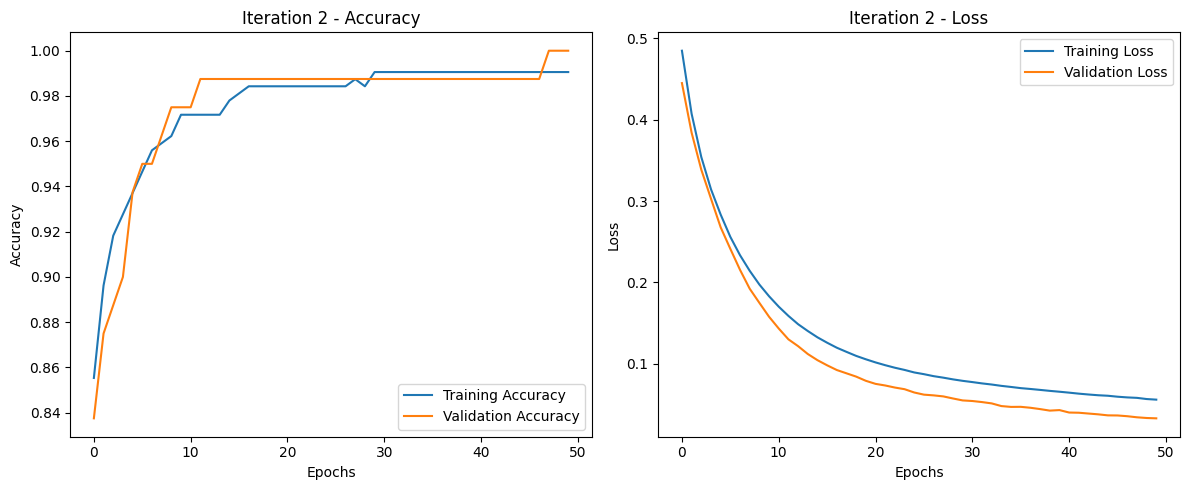

Iteration 3/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


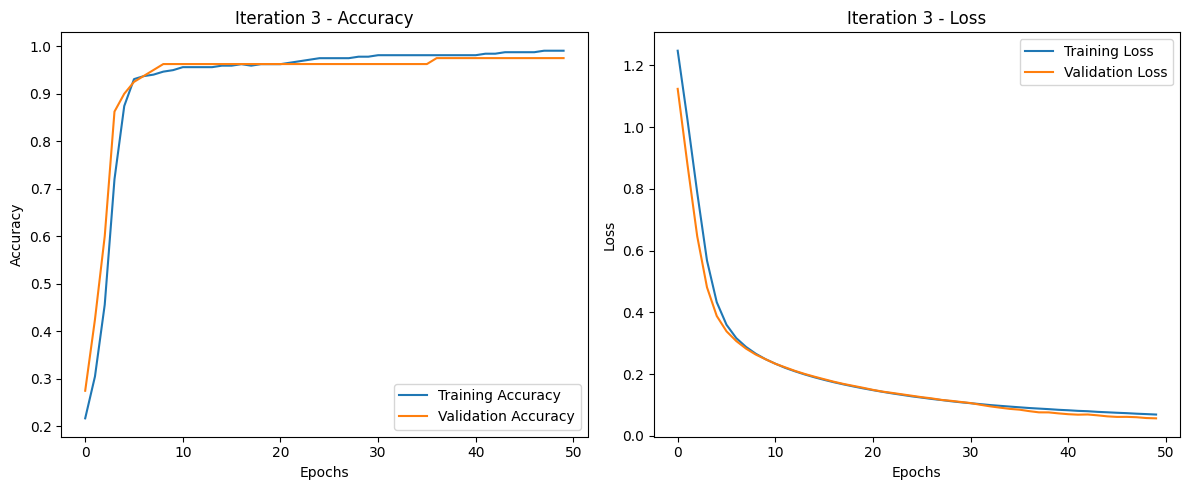


Average Classification Report:
0:
  precision: 0.9590
  recall: 0.9635
  f1-score: 0.9611
  support: 64.0000
1:
  precision: 0.9782
  recall: 0.9751
  f1-score: 0.9766
  support: 107.0000
accuracy: 0.9708
macro avg:
  precision: 0.9686
  recall: 0.9693
  f1-score: 0.9688
  support: 171.0000
weighted avg:
  precision: 0.9710
  recall: 0.9708
  f1-score: 0.9708
  support: 171.0000


In [ ]:
def piecewise_activation(x):
    return tf.keras.activations.tanh(x)

class PiecewiseActivation(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PiecewiseActivation, self).__init__(**kwargs)

    def call(self, inputs):
        return piecewise_activation(inputs)

# Load and preprocess the Iris dataset
iris_data = load_breast_cancer()
X_iris, y_iris = iris_data.data, iris_data.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = preprocess_data(X_iris, y_iris)

# Step 3: Build the model
def create_model(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(4, activation=PiecewiseActivation(), input_shape=(input_dim,)),
        tf.keras.layers.Dense(2, activation=PiecewiseActivation()),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and evaluate
def train_and_evaluate(num_iterations=3):
    reports = []
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        model = create_model(X_train_iris.shape[1], y_train_iris.shape[1])
        history = model.fit(
            X_train_iris, y_train_iris, epochs=50, batch_size=16, verbose=0, validation_split=0.2
        )

        # Evaluate
        predictions = model.predict(X_test_iris)
        y_test_labels = np.argmax(y_test_iris, axis=1)
        y_pred_labels = np.argmax(predictions, axis=1)

        # Collect classification report
        report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
        reports.append(report)

        # Plot training and validation accuracy for this iteration
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Iteration {iteration + 1} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training and validation loss for this iteration
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Iteration {iteration + 1} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Average classification report
    avg_report = {}
    for key in reports[0]:
        if isinstance(reports[0][key], dict):  # For class-specific metrics
            avg_report[key] = {
                metric: np.mean([r[key][metric] for r in reports if key in r and metric in r[key]])
                for metric in reports[0][key]
            }
        else:  # For overall metrics (e.g., 'accuracy')
            avg_report[key] = np.mean([r[key] for r in reports if key in r])

    print("\nAverage Classification Report:")
    for key, metrics in avg_report.items():
        if isinstance(metrics, dict):
            print(f"{key}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")
        else:
            print(f"{key}: {metrics:.4f}")

# Run the evaluation
train_and_evaluate()

Iteration 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


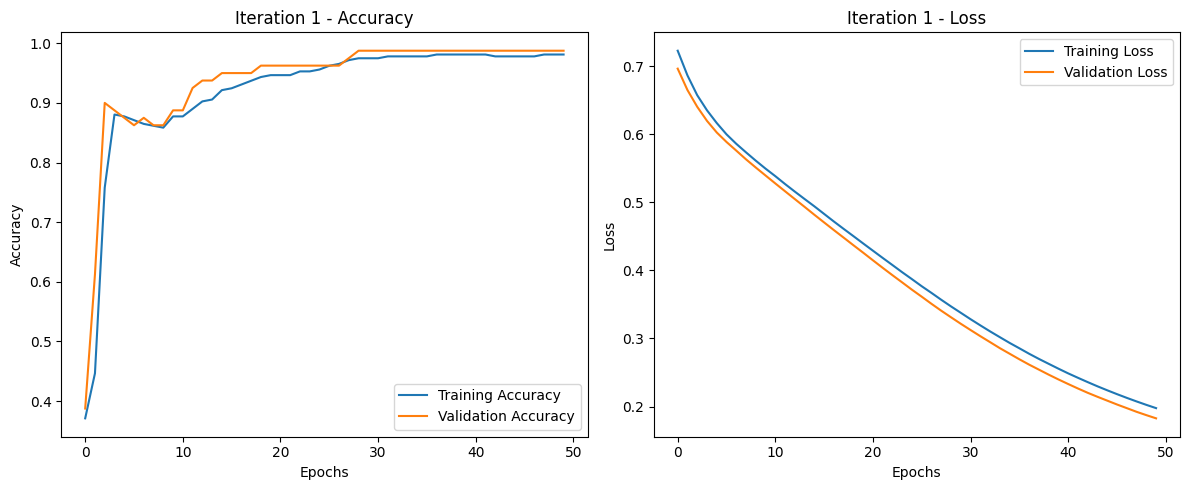

Iteration 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


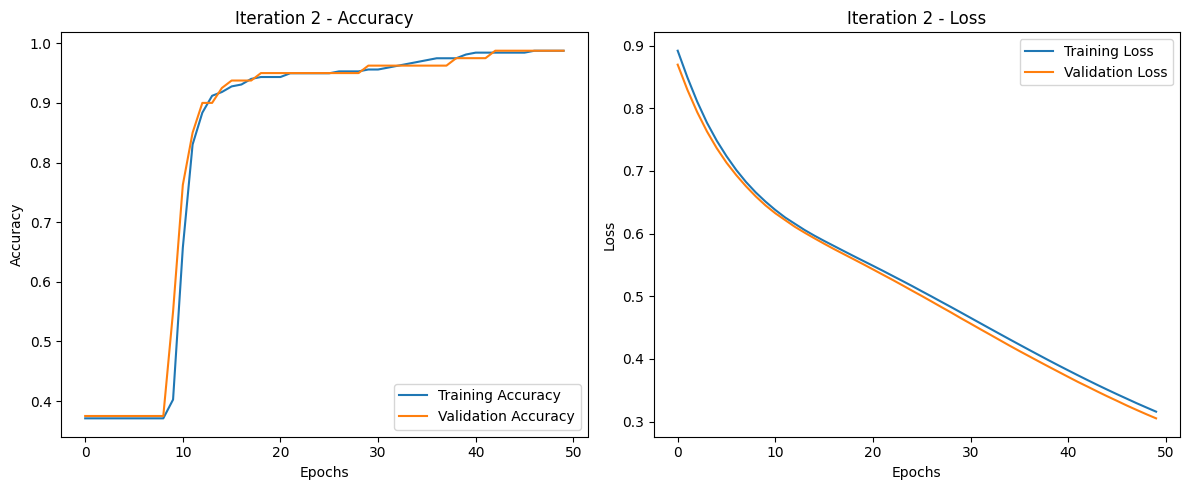

Iteration 3/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


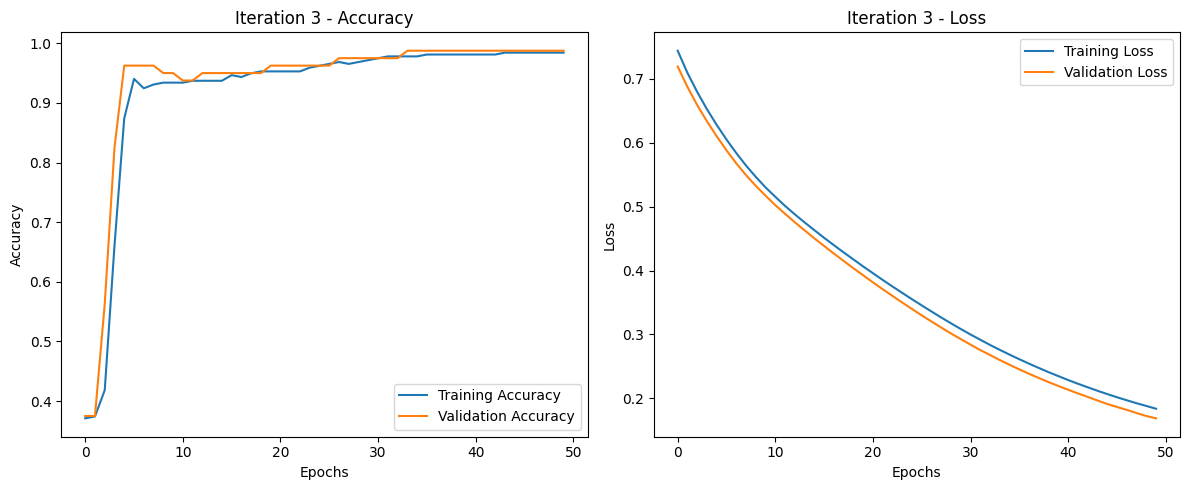


Average Classification Report:
0:
  precision: 0.9840
  recall: 0.9635
  f1-score: 0.9737
  support: 64.0000
1:
  precision: 0.9785
  recall: 0.9907
  f1-score: 0.9845
  support: 107.0000
accuracy: 0.9805
macro avg:
  precision: 0.9813
  recall: 0.9771
  f1-score: 0.9791
  support: 171.0000
weighted avg:
  precision: 0.9806
  recall: 0.9805
  f1-score: 0.9805
  support: 171.0000


In [ ]:
def piecewise_activation(x):
    return tf.keras.activations.sigmoid(x)

class PiecewiseActivation(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PiecewiseActivation, self).__init__(**kwargs)

    def call(self, inputs):
        return piecewise_activation(inputs)

# Load and preprocess the Iris dataset
iris_data = load_breast_cancer()
X_iris, y_iris = iris_data.data, iris_data.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = preprocess_data(X_iris, y_iris)

# Step 3: Build the model
def create_model(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(4, activation=PiecewiseActivation(), input_shape=(input_dim,)),
        tf.keras.layers.Dense(2, activation=PiecewiseActivation()),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and evaluate
def train_and_evaluate(num_iterations=3):
    reports = []
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        model = create_model(X_train_iris.shape[1], y_train_iris.shape[1])
        history = model.fit(
            X_train_iris, y_train_iris, epochs=50, batch_size=16, verbose=0, validation_split=0.2
        )

        # Evaluate
        predictions = model.predict(X_test_iris)
        y_test_labels = np.argmax(y_test_iris, axis=1)
        y_pred_labels = np.argmax(predictions, axis=1)

        # Collect classification report
        report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
        reports.append(report)

        # Plot training and validation accuracy for this iteration
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Iteration {iteration + 1} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training and validation loss for this iteration
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Iteration {iteration + 1} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Average classification report
    avg_report = {}
    for key in reports[0]:
        if isinstance(reports[0][key], dict):  # For class-specific metrics
            avg_report[key] = {
                metric: np.mean([r[key][metric] for r in reports if key in r and metric in r[key]])
                for metric in reports[0][key]
            }
        else:  # For overall metrics (e.g., 'accuracy')
            avg_report[key] = np.mean([r[key] for r in reports if key in r])

    print("\nAverage Classification Report:")
    for key, metrics in avg_report.items():
        if isinstance(metrics, dict):
            print(f"{key}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")
        else:
            print(f"{key}: {metrics:.4f}")

# Run the evaluation
train_and_evaluate()

Iteration 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


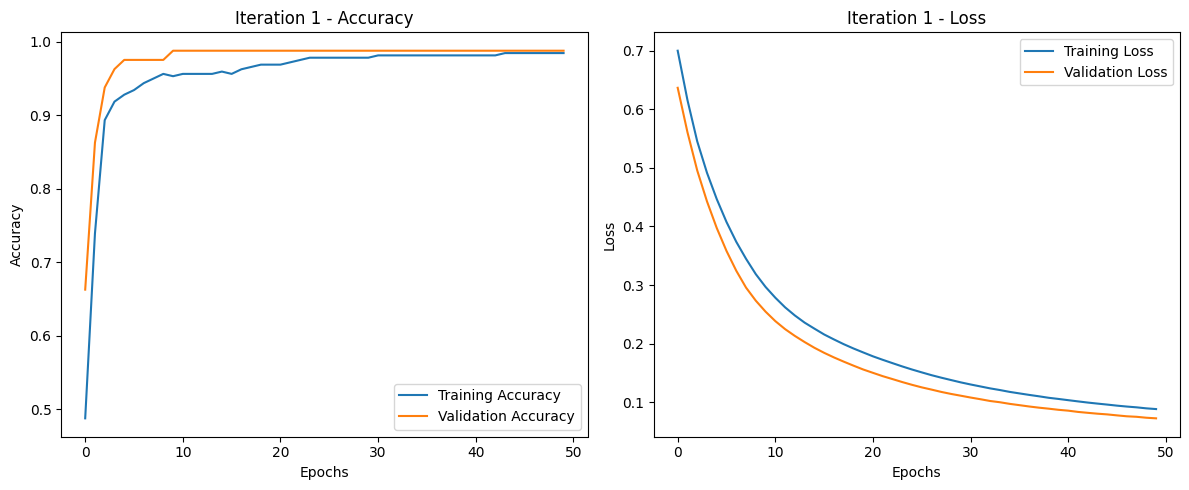

Iteration 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


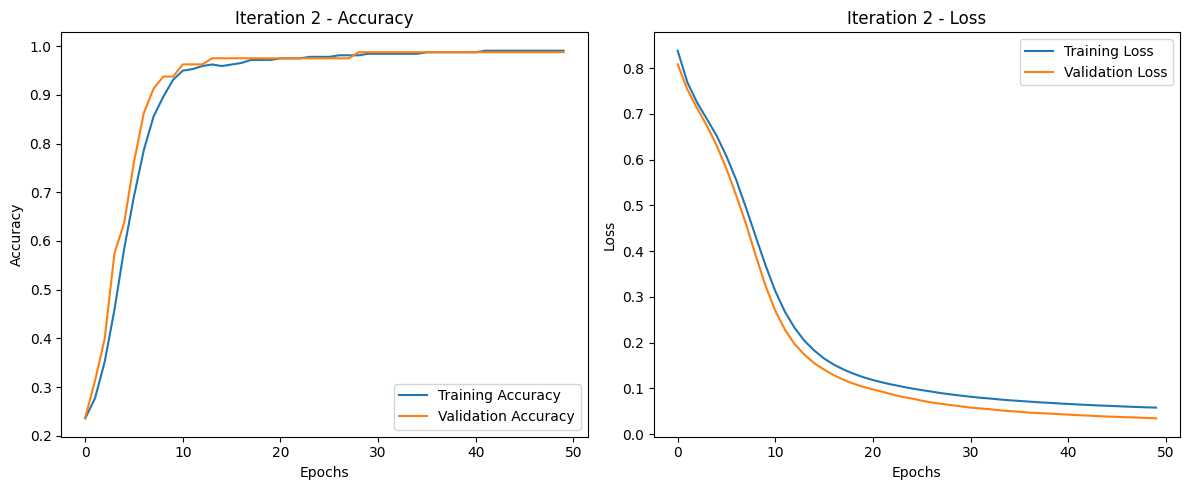

Iteration 3/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


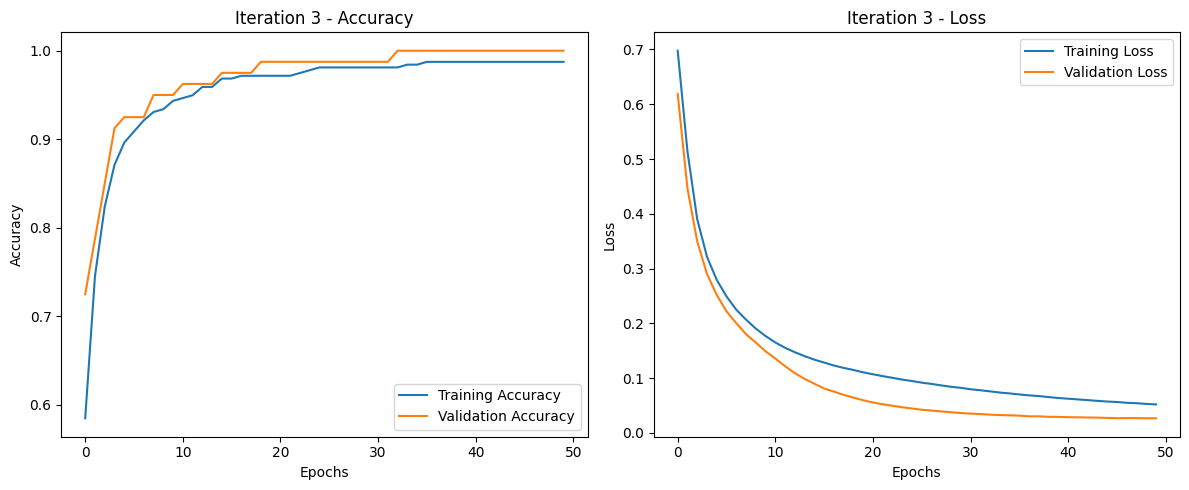


Average Classification Report:
0:
  precision: 0.9538
  recall: 0.9635
  f1-score: 0.9586
  support: 64.0000
1:
  precision: 0.9781
  recall: 0.9720
  f1-score: 0.9750
  support: 107.0000
accuracy: 0.9688
macro avg:
  precision: 0.9659
  recall: 0.9678
  f1-score: 0.9668
  support: 171.0000
weighted avg:
  precision: 0.9690
  recall: 0.9688
  f1-score: 0.9688
  support: 171.0000


In [ ]:
def piecewise_activation(x):
    return tf.keras.activations.swish(x)

class PiecewiseActivation(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PiecewiseActivation, self).__init__(**kwargs)

    def call(self, inputs):
        return piecewise_activation(inputs)

# Load and preprocess the Iris dataset
iris_data = load_breast_cancer()
X_iris, y_iris = iris_data.data, iris_data.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = preprocess_data(X_iris, y_iris)

# Step 3: Build the model
def create_model(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(4, activation=PiecewiseActivation(), input_shape=(input_dim,)),
        tf.keras.layers.Dense(2, activation=PiecewiseActivation()),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and evaluate
def train_and_evaluate(num_iterations=3):
    reports = []
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        model = create_model(X_train_iris.shape[1], y_train_iris.shape[1])
        history = model.fit(
            X_train_iris, y_train_iris, epochs=50, batch_size=16, verbose=0, validation_split=0.2
        )

        # Evaluate
        predictions = model.predict(X_test_iris)
        y_test_labels = np.argmax(y_test_iris, axis=1)
        y_pred_labels = np.argmax(predictions, axis=1)

        # Collect classification report
        report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
        reports.append(report)

        # Plot training and validation accuracy for this iteration
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Iteration {iteration + 1} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training and validation loss for this iteration
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Iteration {iteration + 1} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Average classification report
    avg_report = {}
    for key in reports[0]:
        if isinstance(reports[0][key], dict):  # For class-specific metrics
            avg_report[key] = {
                metric: np.mean([r[key][metric] for r in reports if key in r and metric in r[key]])
                for metric in reports[0][key]
            }
        else:  # For overall metrics (e.g., 'accuracy')
            avg_report[key] = np.mean([r[key] for r in reports if key in r])

    print("\nAverage Classification Report:")
    for key, metrics in avg_report.items():
        if isinstance(metrics, dict):
            print(f"{key}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")
        else:
            print(f"{key}: {metrics:.4f}")

# Run the evaluation
train_and_evaluate()

Iteration 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


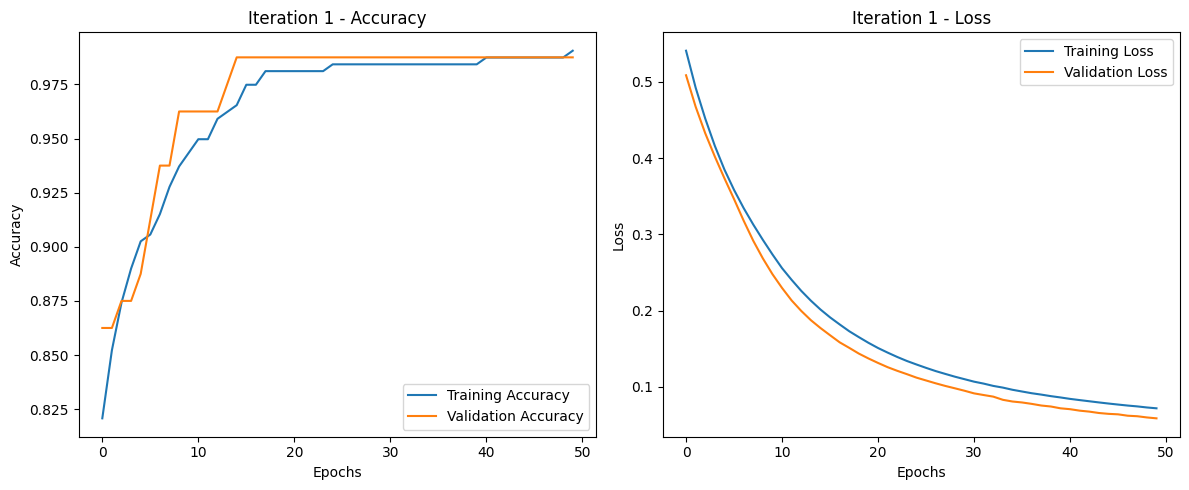

Iteration 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


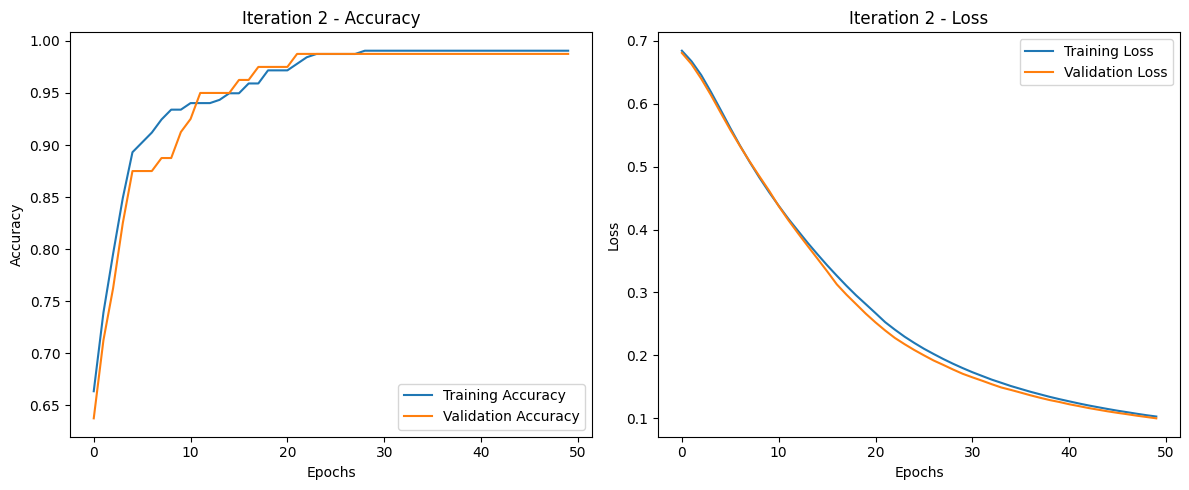

Iteration 3/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


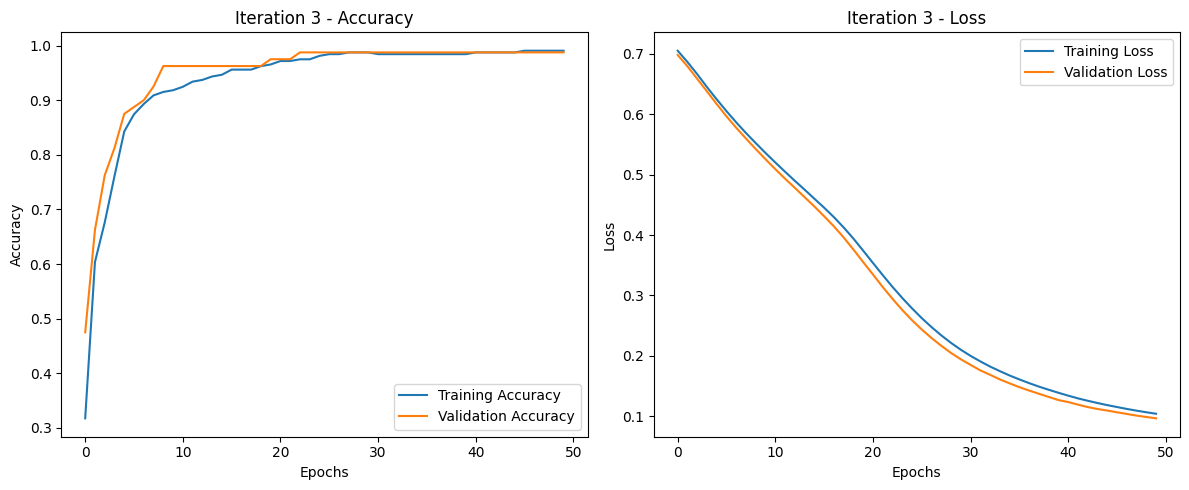


Average Classification Report:
0:
  precision: 0.9593
  recall: 0.9740
  f1-score: 0.9664
  support: 64.0000
1:
  precision: 0.9843
  recall: 0.9751
  f1-score: 0.9796
  support: 107.0000
accuracy: 0.9747
macro avg:
  precision: 0.9718
  recall: 0.9745
  f1-score: 0.9730
  support: 171.0000
weighted avg:
  precision: 0.9750
  recall: 0.9747
  f1-score: 0.9747
  support: 171.0000


In [ ]:
def piecewise_activation(x):
    return tf.keras.activations.softsign(x)

class PiecewiseActivation(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PiecewiseActivation, self).__init__(**kwargs)

    def call(self, inputs):
        return piecewise_activation(inputs)

# Load and preprocess the Iris dataset
iris_data = load_breast_cancer()
X_iris, y_iris = iris_data.data, iris_data.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = preprocess_data(X_iris, y_iris)

# Step 3: Build the model
def create_model(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(4, activation=PiecewiseActivation(), input_shape=(input_dim,)),
        tf.keras.layers.Dense(2, activation=PiecewiseActivation()),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and evaluate
def train_and_evaluate(num_iterations=3):
    reports = []
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        model = create_model(X_train_iris.shape[1], y_train_iris.shape[1])
        history = model.fit(
            X_train_iris, y_train_iris, epochs=50, batch_size=16, verbose=0, validation_split=0.2
        )

        # Evaluate
        predictions = model.predict(X_test_iris)
        y_test_labels = np.argmax(y_test_iris, axis=1)
        y_pred_labels = np.argmax(predictions, axis=1)

        # Collect classification report
        report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
        reports.append(report)

        # Plot training and validation accuracy for this iteration
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Iteration {iteration + 1} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training and validation loss for this iteration
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Iteration {iteration + 1} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Average classification report
    avg_report = {}
    for key in reports[0]:
        if isinstance(reports[0][key], dict):  # For class-specific metrics
            avg_report[key] = {
                metric: np.mean([r[key][metric] for r in reports if key in r and metric in r[key]])
                for metric in reports[0][key]
            }
        else:  # For overall metrics (e.g., 'accuracy')
            avg_report[key] = np.mean([r[key] for r in reports if key in r])

    print("\nAverage Classification Report:")
    for key, metrics in avg_report.items():
        if isinstance(metrics, dict):
            print(f"{key}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")
        else:
            print(f"{key}: {metrics:.4f}")

# Run the evaluation
train_and_evaluate()

Iteration 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


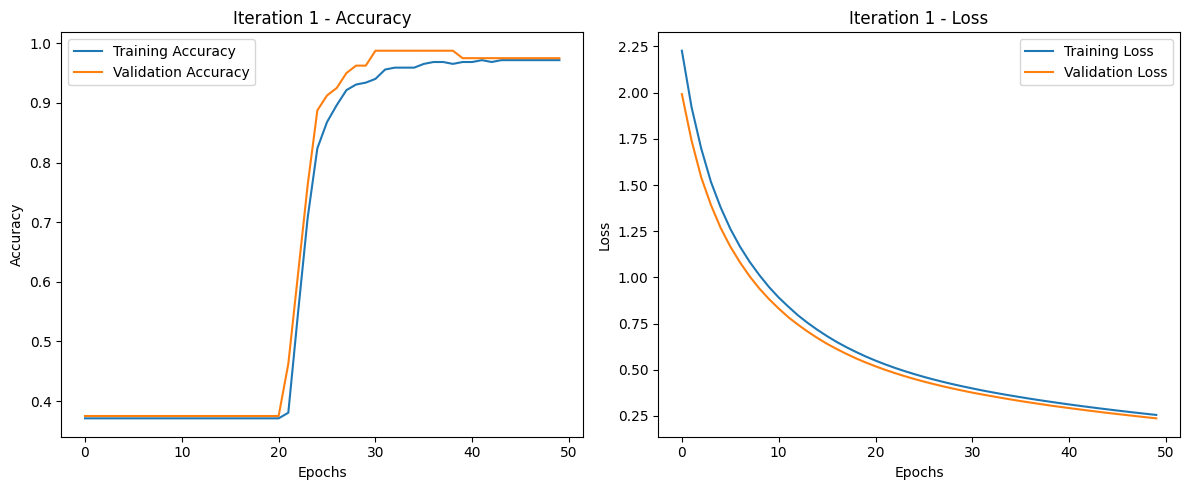

Iteration 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


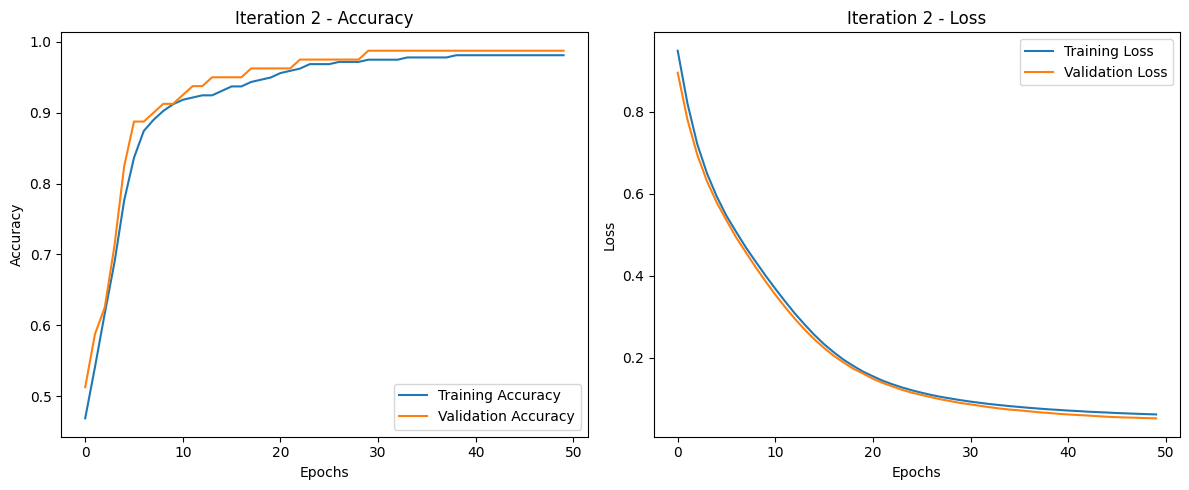

Iteration 3/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


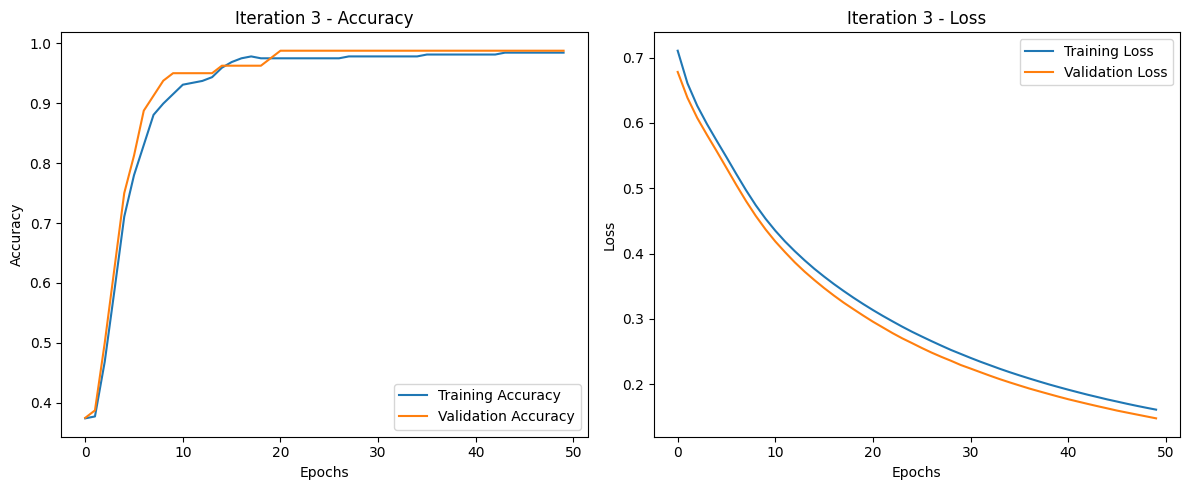


Average Classification Report:
0:
  precision: 0.9748
  recall: 0.9427
  f1-score: 0.9572
  support: 64.0000
1:
  precision: 0.9674
  recall: 0.9844
  f1-score: 0.9754
  support: 107.0000
accuracy: 0.9688
macro avg:
  precision: 0.9711
  recall: 0.9636
  f1-score: 0.9663
  support: 171.0000
weighted avg:
  precision: 0.9702
  recall: 0.9688
  f1-score: 0.9686
  support: 171.0000


In [ ]:
def piecewise_activation(x):
    return tf.keras.activations.softplus(x)

class PiecewiseActivation(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PiecewiseActivation, self).__init__(**kwargs)

    def call(self, inputs):
        return piecewise_activation(inputs)

# Load and preprocess the Iris dataset
iris_data = load_breast_cancer()
X_iris, y_iris = iris_data.data, iris_data.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = preprocess_data(X_iris, y_iris)

# Step 3: Build the model
def create_model(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(4, activation=PiecewiseActivation(), input_shape=(input_dim,)),
        tf.keras.layers.Dense(2, activation=PiecewiseActivation()),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and evaluate
def train_and_evaluate(num_iterations=3):
    reports = []
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        model = create_model(X_train_iris.shape[1], y_train_iris.shape[1])
        history = model.fit(
            X_train_iris, y_train_iris, epochs=50, batch_size=16, verbose=0, validation_split=0.2
        )

        # Evaluate
        predictions = model.predict(X_test_iris)
        y_test_labels = np.argmax(y_test_iris, axis=1)
        y_pred_labels = np.argmax(predictions, axis=1)

        # Collect classification report
        report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
        reports.append(report)

        # Plot training and validation accuracy for this iteration
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Iteration {iteration + 1} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training and validation loss for this iteration
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Iteration {iteration + 1} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Average classification report
    avg_report = {}
    for key in reports[0]:
        if isinstance(reports[0][key], dict):  # For class-specific metrics
            avg_report[key] = {
                metric: np.mean([r[key][metric] for r in reports if key in r and metric in r[key]])
                for metric in reports[0][key]
            }
        else:  # For overall metrics (e.g., 'accuracy')
            avg_report[key] = np.mean([r[key] for r in reports if key in r])

    print("\nAverage Classification Report:")
    for key, metrics in avg_report.items():
        if isinstance(metrics, dict):
            print(f"{key}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")
        else:
            print(f"{key}: {metrics:.4f}")

# Run the evaluation
train_and_evaluate()

Iteration 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


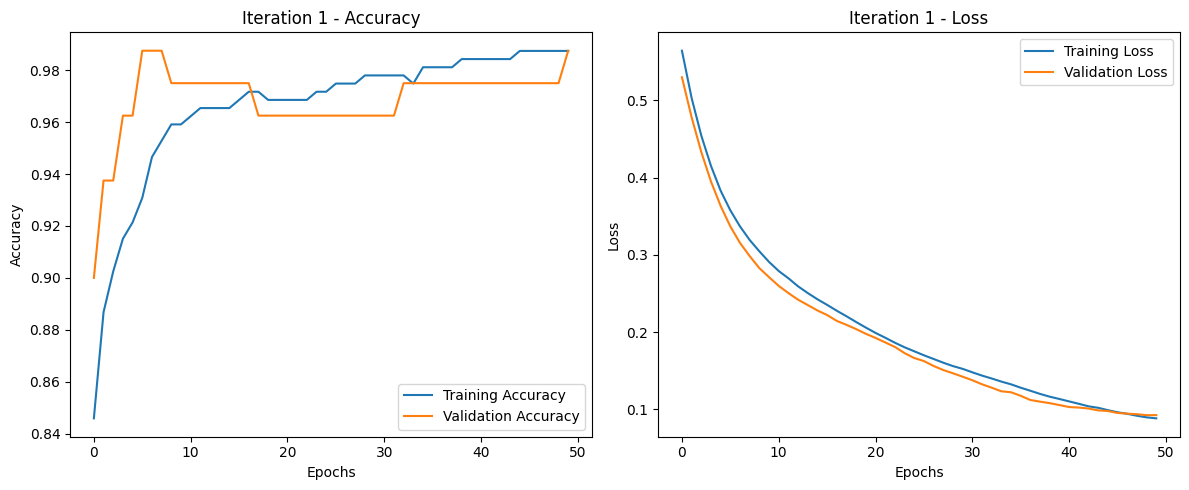

Iteration 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


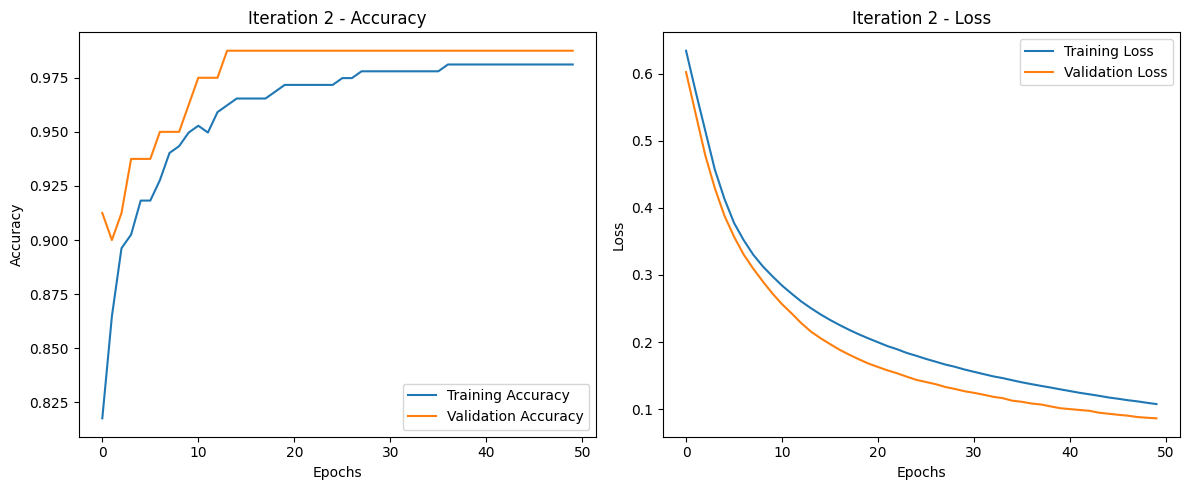

Iteration 3/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


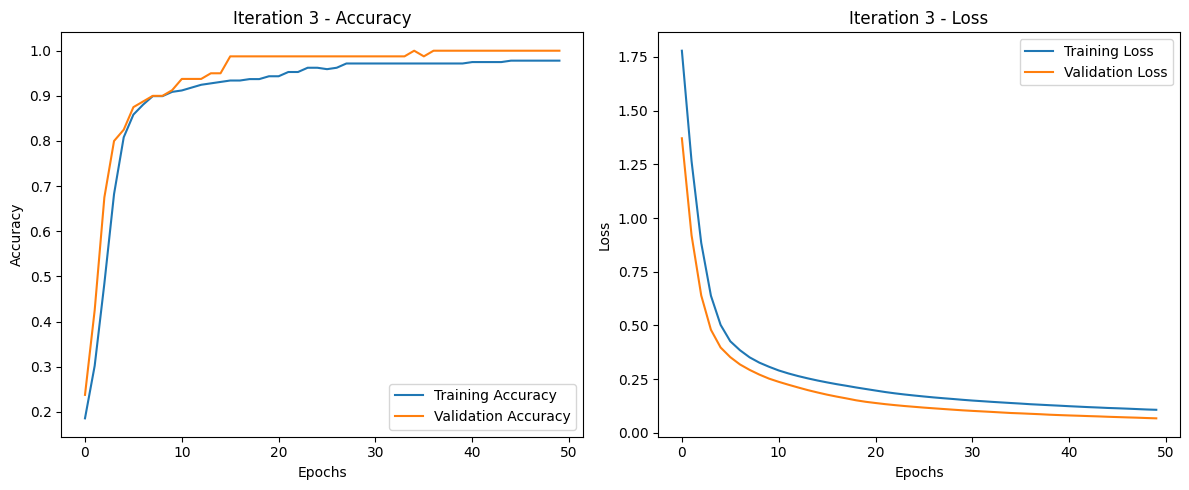


Average Classification Report:
0:
  precision: 0.9493
  recall: 0.9740
  f1-score: 0.9614
  support: 64.0000
1:
  precision: 0.9842
  recall: 0.9688
  f1-score: 0.9765
  support: 107.0000
accuracy: 0.9708
macro avg:
  precision: 0.9667
  recall: 0.9714
  f1-score: 0.9689
  support: 171.0000
weighted avg:
  precision: 0.9711
  recall: 0.9708
  f1-score: 0.9708
  support: 171.0000


In [ ]:
def piecewise_activation(x):
    return tf.keras.activations.mish(x)

class PiecewiseActivation(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PiecewiseActivation, self).__init__(**kwargs)

    def call(self, inputs):
        return piecewise_activation(inputs)

# Load and preprocess the Iris dataset
iris_data = load_breast_cancer()
X_iris, y_iris = iris_data.data, iris_data.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = preprocess_data(X_iris, y_iris)

# Step 3: Build the model
def create_model(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(4, activation=PiecewiseActivation(), input_shape=(input_dim,)),
        tf.keras.layers.Dense(2, activation=PiecewiseActivation()),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and evaluate
def train_and_evaluate(num_iterations=3):
    reports = []
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        model = create_model(X_train_iris.shape[1], y_train_iris.shape[1])
        history = model.fit(
            X_train_iris, y_train_iris, epochs=50, batch_size=16, verbose=0, validation_split=0.2
        )

        # Evaluate
        predictions = model.predict(X_test_iris)
        y_test_labels = np.argmax(y_test_iris, axis=1)
        y_pred_labels = np.argmax(predictions, axis=1)

        # Collect classification report
        report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
        reports.append(report)

        # Plot training and validation accuracy for this iteration
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Iteration {iteration + 1} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training and validation loss for this iteration
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Iteration {iteration + 1} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Average classification report
    avg_report = {}
    for key in reports[0]:
        if isinstance(reports[0][key], dict):  # For class-specific metrics
            avg_report[key] = {
                metric: np.mean([r[key][metric] for r in reports if key in r and metric in r[key]])
                for metric in reports[0][key]
            }
        else:  # For overall metrics (e.g., 'accuracy')
            avg_report[key] = np.mean([r[key] for r in reports if key in r])

    print("\nAverage Classification Report:")
    for key, metrics in avg_report.items():
        if isinstance(metrics, dict):
            print(f"{key}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")
        else:
            print(f"{key}: {metrics:.4f}")

# Run the evaluation
train_and_evaluate()

Iteration 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


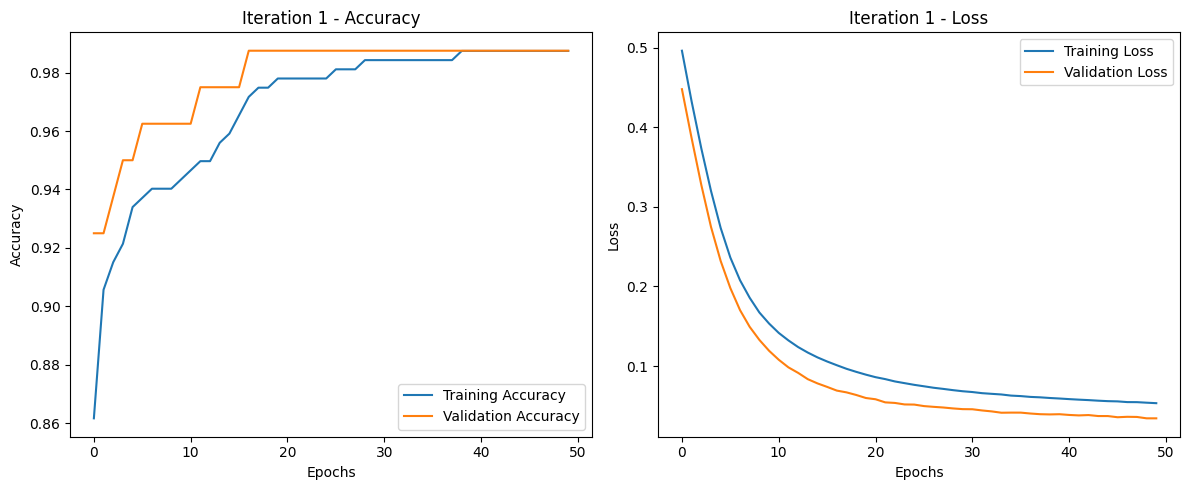

Iteration 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


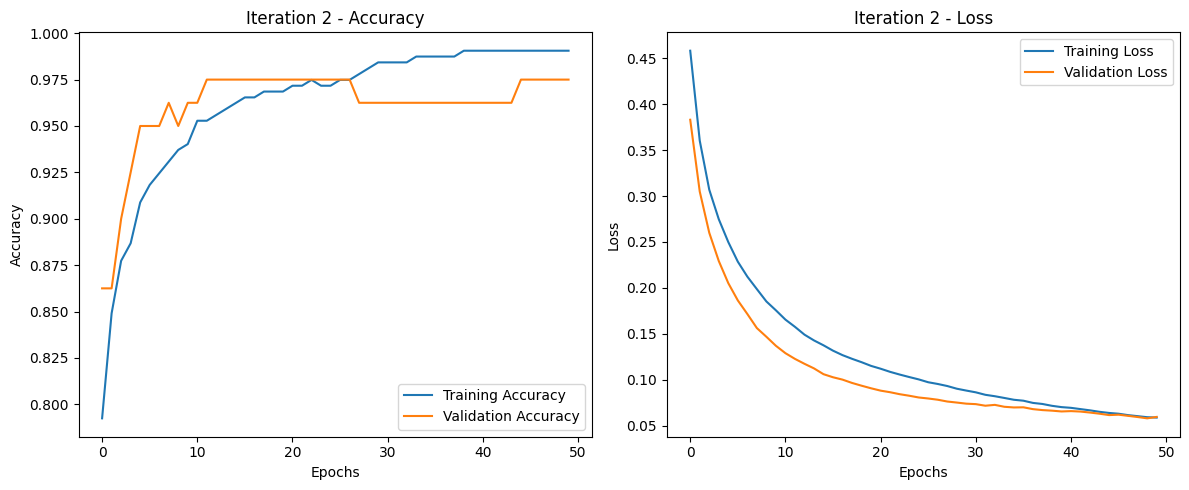

Iteration 3/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


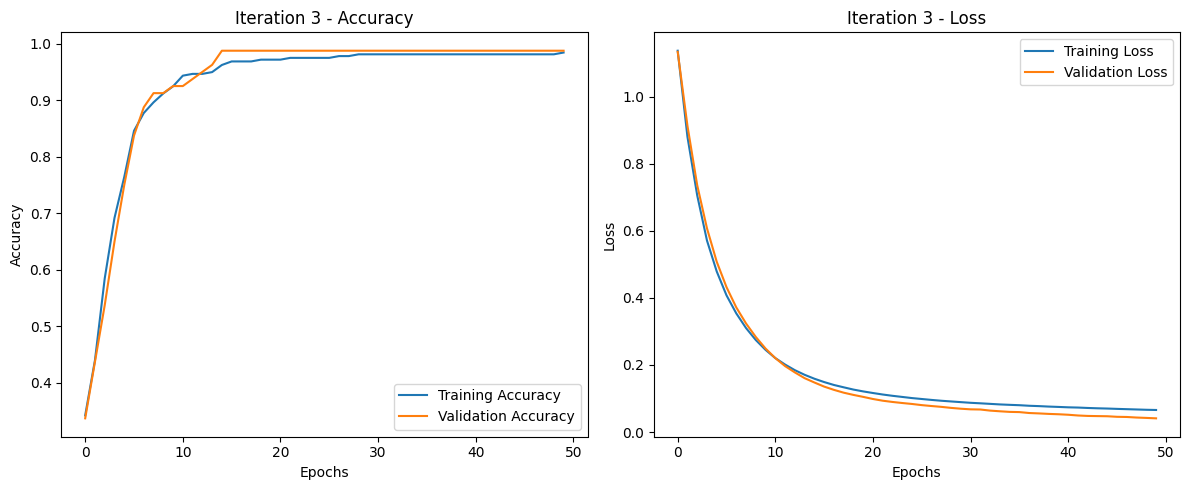


Average Classification Report:
0:
  precision: 0.9495
  recall: 0.9792
  f1-score: 0.9641
  support: 64.0000
1:
  precision: 0.9873
  recall: 0.9688
  f1-score: 0.9780
  support: 107.0000
accuracy: 0.9727
macro avg:
  precision: 0.9684
  recall: 0.9740
  f1-score: 0.9710
  support: 171.0000
weighted avg:
  precision: 0.9732
  recall: 0.9727
  f1-score: 0.9728
  support: 171.0000


In [ ]:
def piecewise_activation(x):
    return tf.keras.activations.elu(x)

class PiecewiseActivation(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PiecewiseActivation, self).__init__(**kwargs)

    def call(self, inputs):
        return piecewise_activation(inputs)

# Load and preprocess the Iris dataset
iris_data = load_breast_cancer()
X_iris, y_iris = iris_data.data, iris_data.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = preprocess_data(X_iris, y_iris)

# Step 3: Build the model
def create_model(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(4, activation=PiecewiseActivation(), input_shape=(input_dim,)),
        tf.keras.layers.Dense(2, activation=PiecewiseActivation()),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and evaluate
def train_and_evaluate(num_iterations=3):
    reports = []
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        model = create_model(X_train_iris.shape[1], y_train_iris.shape[1])
        history = model.fit(
            X_train_iris, y_train_iris, epochs=50, batch_size=16, verbose=0, validation_split=0.2
        )

        # Evaluate
        predictions = model.predict(X_test_iris)
        y_test_labels = np.argmax(y_test_iris, axis=1)
        y_pred_labels = np.argmax(predictions, axis=1)

        # Collect classification report
        report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
        reports.append(report)

        # Plot training and validation accuracy for this iteration
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Iteration {iteration + 1} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training and validation loss for this iteration
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Iteration {iteration + 1} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Average classification report
    avg_report = {}
    for key in reports[0]:
        if isinstance(reports[0][key], dict):  # For class-specific metrics
            avg_report[key] = {
                metric: np.mean([r[key][metric] for r in reports if key in r and metric in r[key]])
                for metric in reports[0][key]
            }
        else:  # For overall metrics (e.g., 'accuracy')
            avg_report[key] = np.mean([r[key] for r in reports if key in r])

    print("\nAverage Classification Report:")
    for key, metrics in avg_report.items():
        if isinstance(metrics, dict):
            print(f"{key}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")
        else:
            print(f"{key}: {metrics:.4f}")

# Run the evaluation
train_and_evaluate()

Iteration 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


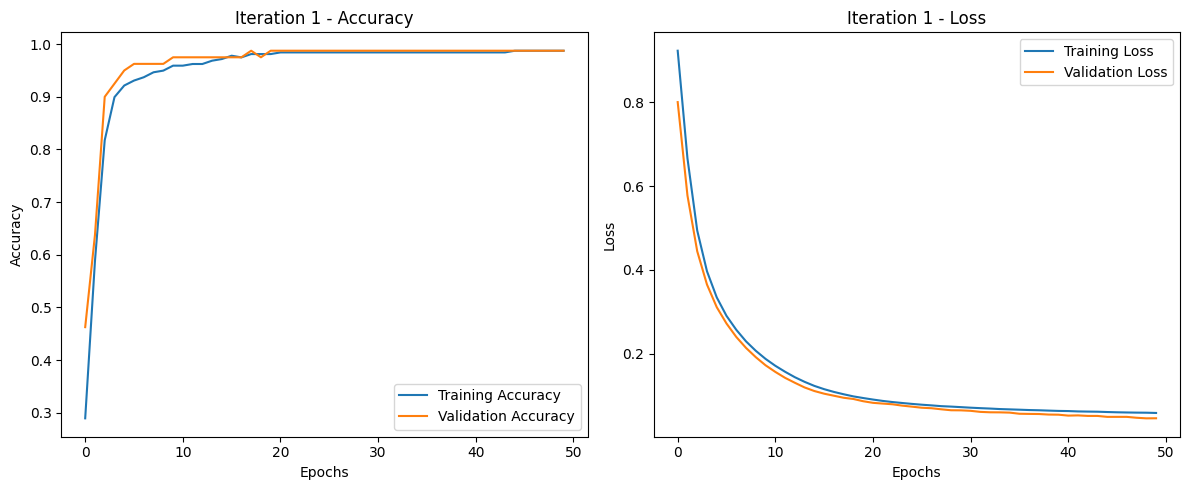

Iteration 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


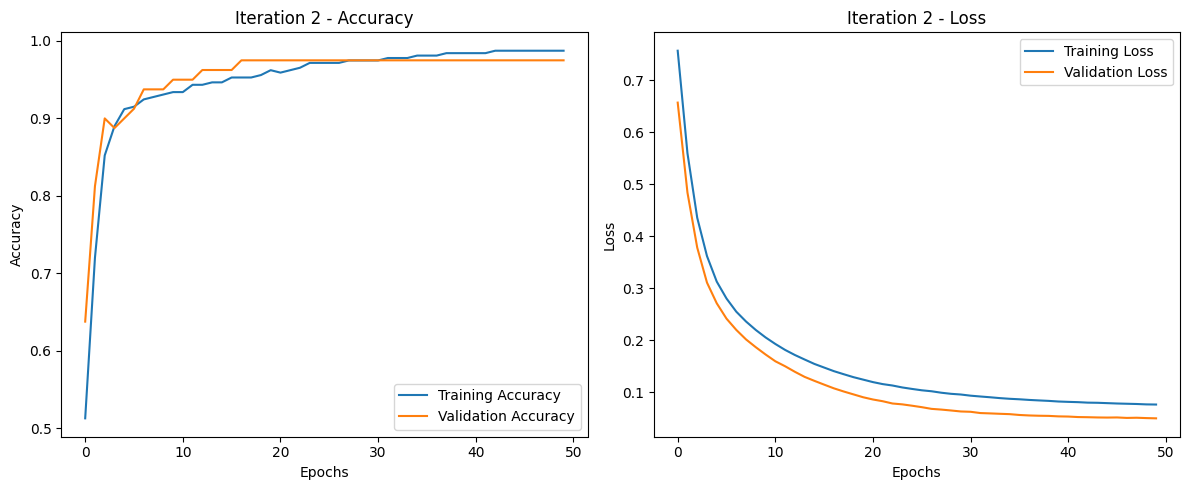

Iteration 3/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


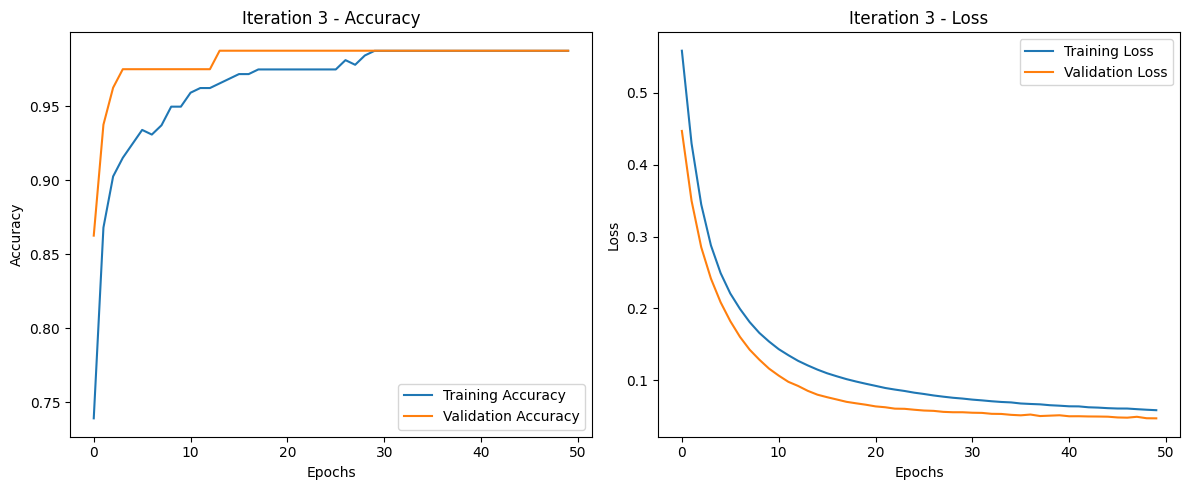


Average Classification Report:
0:
  precision: 0.9495
  recall: 0.9792
  f1-score: 0.9641
  support: 64.0000
1:
  precision: 0.9873
  recall: 0.9688
  f1-score: 0.9780
  support: 107.0000
accuracy: 0.9727
macro avg:
  precision: 0.9684
  recall: 0.9740
  f1-score: 0.9710
  support: 171.0000
weighted avg:
  precision: 0.9732
  recall: 0.9727
  f1-score: 0.9728
  support: 171.0000


In [ ]:
def piecewise_activation(x):
    return tf.keras.activations.selu(x)

class PiecewiseActivation(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PiecewiseActivation, self).__init__(**kwargs)

    def call(self, inputs):
        return piecewise_activation(inputs)

# Load and preprocess the Iris dataset
iris_data = load_breast_cancer()
X_iris, y_iris = iris_data.data, iris_data.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = preprocess_data(X_iris, y_iris)

# Step 3: Build the model
def create_model(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(4, activation=PiecewiseActivation(), input_shape=(input_dim,)),
        tf.keras.layers.Dense(2, activation=PiecewiseActivation()),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and evaluate
def train_and_evaluate(num_iterations=3):
    reports = []
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        model = create_model(X_train_iris.shape[1], y_train_iris.shape[1])
        history = model.fit(
            X_train_iris, y_train_iris, epochs=50, batch_size=16, verbose=0, validation_split=0.2
        )

        # Evaluate
        predictions = model.predict(X_test_iris)
        y_test_labels = np.argmax(y_test_iris, axis=1)
        y_pred_labels = np.argmax(predictions, axis=1)

        # Collect classification report
        report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
        reports.append(report)

        # Plot training and validation accuracy for this iteration
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Iteration {iteration + 1} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training and validation loss for this iteration
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Iteration {iteration + 1} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Average classification report
    avg_report = {}
    for key in reports[0]:
        if isinstance(reports[0][key], dict):  # For class-specific metrics
            avg_report[key] = {
                metric: np.mean([r[key][metric] for r in reports if key in r and metric in r[key]])
                for metric in reports[0][key]
            }
        else:  # For overall metrics (e.g., 'accuracy')
            avg_report[key] = np.mean([r[key] for r in reports if key in r])

    print("\nAverage Classification Report:")
    for key, metrics in avg_report.items():
        if isinstance(metrics, dict):
            print(f"{key}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")
        else:
            print(f"{key}: {metrics:.4f}")

# Run the evaluation
train_and_evaluate()

**Leaky RELU**

Iteration 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


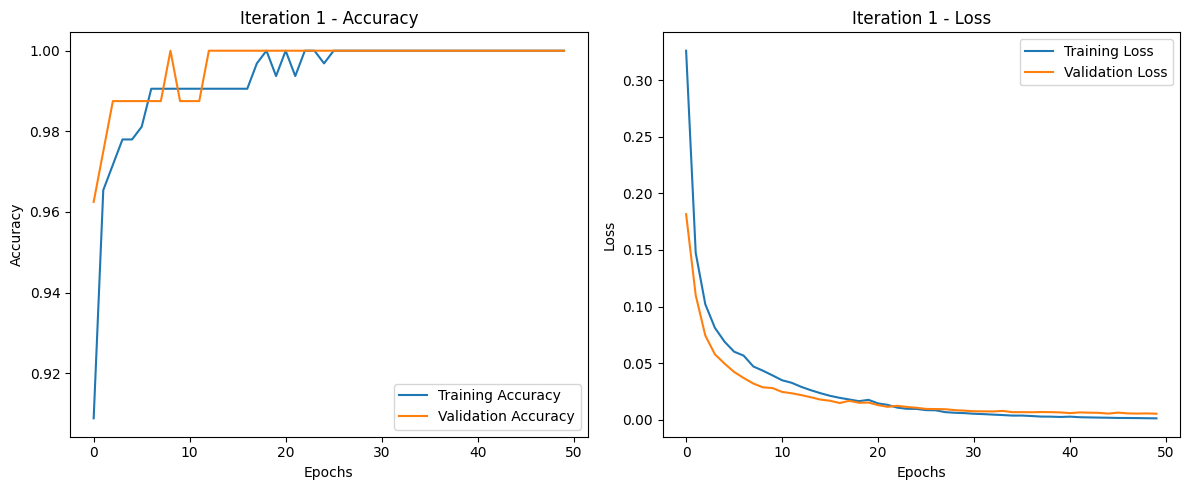

Iteration 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


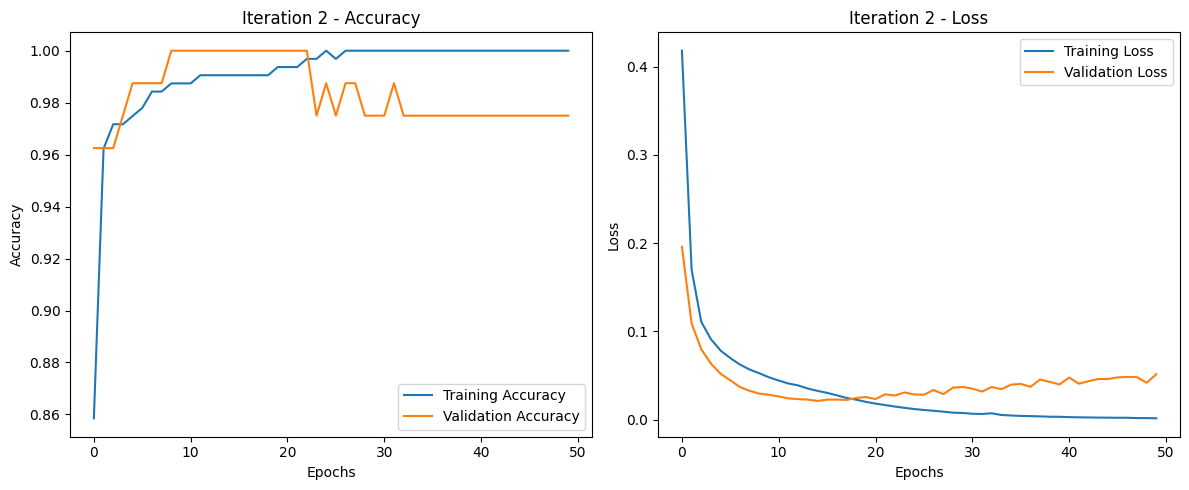

Iteration 3/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


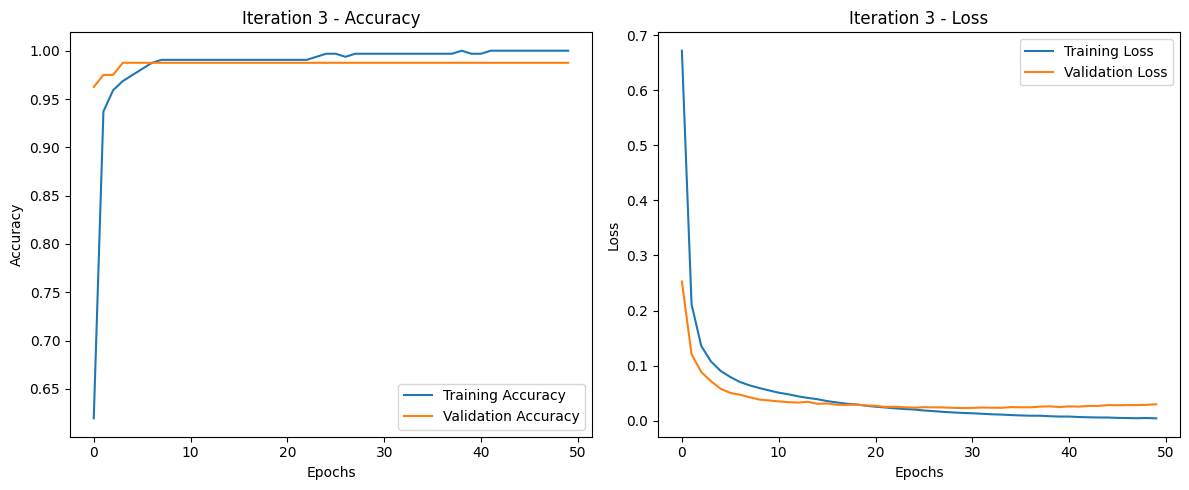


Average Classification Report:
0:
  precision: 0.9403
  recall: 0.9844
  f1-score: 0.9618
  support: 64.0000
1:
  precision: 0.9904
  recall: 0.9626
  f1-score: 0.9763
  support: 107.0000
accuracy: 0.9708
macro avg:
  precision: 0.9653
  recall: 0.9735
  f1-score: 0.9691
  support: 171.0000
weighted avg:
  precision: 0.9716
  recall: 0.9708
  f1-score: 0.9709
  support: 171.0000


In [ ]:
def piecewise_activation(x):
    return tf.where(x > 0, x, 0.01*(x))

class PiecewiseActivation(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PiecewiseActivation, self).__init__(**kwargs)

    def call(self, inputs):
        return piecewise_activation(inputs)

# Load and preprocess the Iris dataset
iris_data = load_breast_cancer()
X_iris, y_iris = iris_data.data, iris_data.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = preprocess_data(X_iris, y_iris)

# Step 3: Build the model
def create_model(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation=PiecewiseActivation(), input_shape=(input_dim,)),
        tf.keras.layers.Dense(32, activation=PiecewiseActivation()),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and evaluate
def train_and_evaluate(num_iterations=3):
    reports = []
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        model = create_model(X_train_iris.shape[1], y_train_iris.shape[1])
        history = model.fit(
            X_train_iris, y_train_iris, epochs=50, batch_size=16, verbose=0, validation_split=0.2
        )

        # Evaluate
        predictions = model.predict(X_test_iris)
        y_test_labels = np.argmax(y_test_iris, axis=1)
        y_pred_labels = np.argmax(predictions, axis=1)

        # Collect classification report
        report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
        reports.append(report)

        # Plot training and validation accuracy for this iteration
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Iteration {iteration + 1} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training and validation loss for this iteration
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Iteration {iteration + 1} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Average classification report
    avg_report = {}
    for key in reports[0]:
        if isinstance(reports[0][key], dict):  # For class-specific metrics
            avg_report[key] = {
                metric: np.mean([r[key][metric] for r in reports if key in r and metric in r[key]])
                for metric in reports[0][key]
            }
        else:  # For overall metrics (e.g., 'accuracy')
            avg_report[key] = np.mean([r[key] for r in reports if key in r])

    print("\nAverage Classification Report:")
    for key, metrics in avg_report.items():
        if isinstance(metrics, dict):
            print(f"{key}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")
        else:
            print(f"{key}: {metrics:.4f}")

# Run the evaluation
train_and_evaluate()

**RELU-Tanh**

Iteration 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


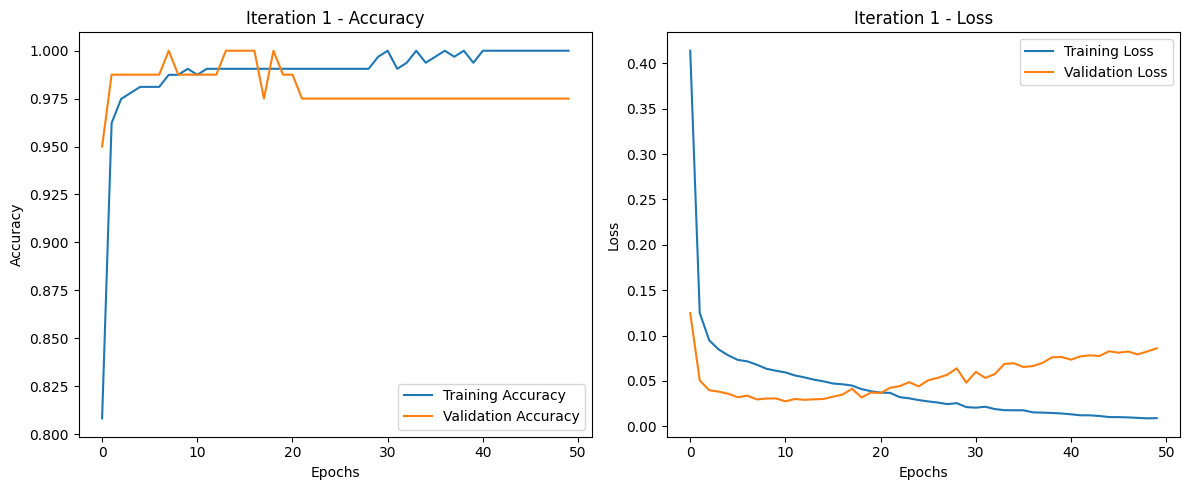

Iteration 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


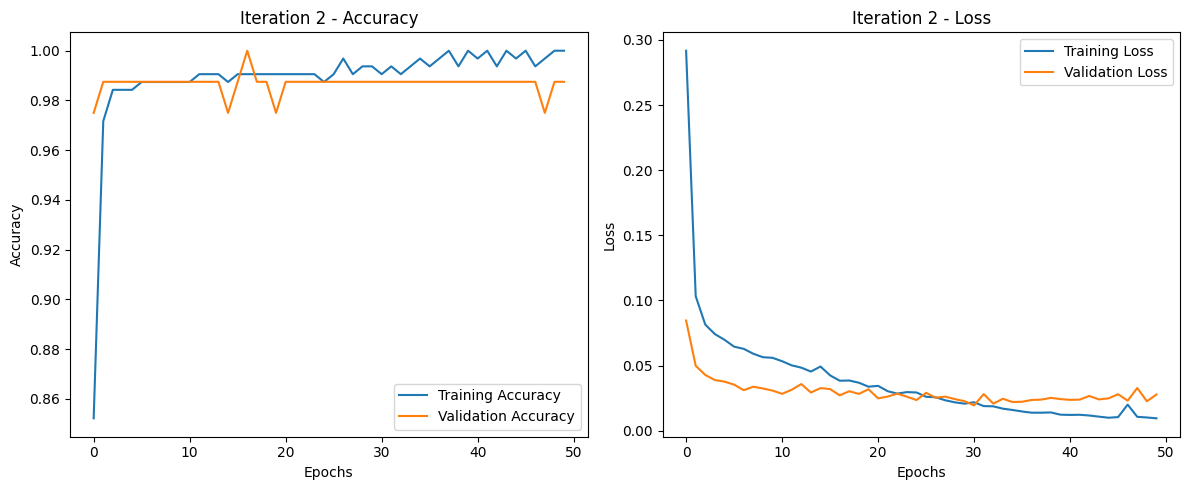

Iteration 3/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


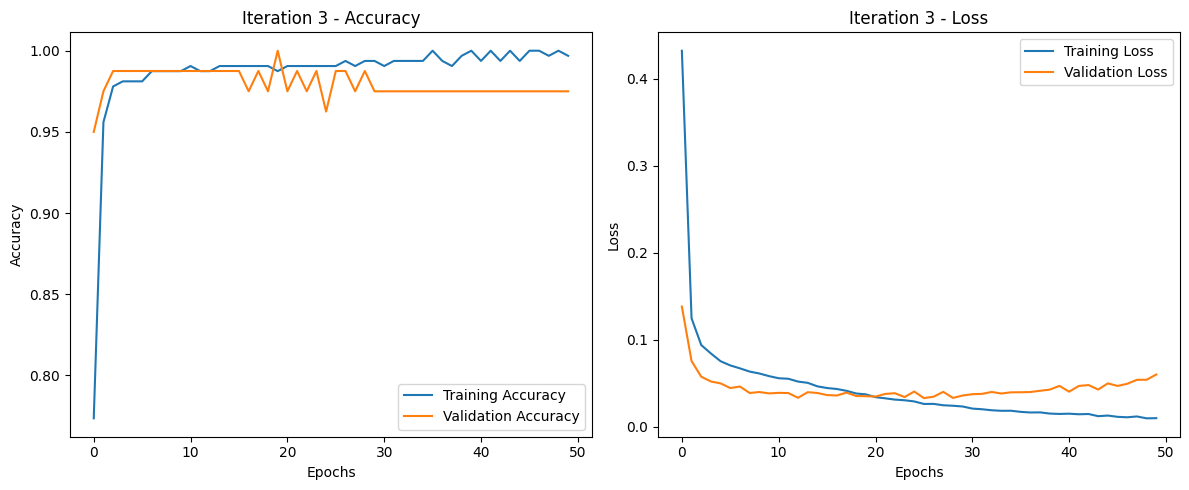


Average Classification Report:
0:
  precision: 0.9644
  recall: 0.9740
  f1-score: 0.9690
  support: 64.0000
1:
  precision: 0.9844
  recall: 0.9782
  f1-score: 0.9812
  support: 107.0000
accuracy: 0.9766
macro avg:
  precision: 0.9744
  recall: 0.9761
  f1-score: 0.9751
  support: 171.0000
weighted avg:
  precision: 0.9769
  recall: 0.9766
  f1-score: 0.9766
  support: 171.0000


In [ ]:
def piecewise_activation(x):
    return tf.where(x > 0, x, tf.tanh(x))

class PiecewiseActivation(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PiecewiseActivation, self).__init__(**kwargs)

    def call(self, inputs):
        return piecewise_activation(inputs)

# Load and preprocess the Iris dataset
iris_data = load_breast_cancer()
X_iris, y_iris = iris_data.data, iris_data.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = preprocess_data(X_iris, y_iris)

# Step 3: Build the model
def create_model(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation=PiecewiseActivation(), input_shape=(input_dim,)),
        tf.keras.layers.Dense(32, activation=PiecewiseActivation()),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and evaluate
def train_and_evaluate(num_iterations=3):
    reports = []
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        model = create_model(X_train_iris.shape[1], y_train_iris.shape[1])
        history = model.fit(
            X_train_iris, y_train_iris, epochs=50, batch_size=16, verbose=0, validation_split=0.2
        )

        # Evaluate
        predictions = model.predict(X_test_iris)
        y_test_labels = np.argmax(y_test_iris, axis=1)
        y_pred_labels = np.argmax(predictions, axis=1)

        # Collect classification report
        report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
        reports.append(report)

        # Plot training and validation accuracy for this iteration
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Iteration {iteration + 1} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training and validation loss for this iteration
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Iteration {iteration + 1} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Average classification report
    avg_report = {}
    for key in reports[0]:
        if isinstance(reports[0][key], dict):  # For class-specific metrics
            avg_report[key] = {
                metric: np.mean([r[key][metric] for r in reports if key in r and metric in r[key]])
                for metric in reports[0][key]
            }
        else:  # For overall metrics (e.g., 'accuracy')
            avg_report[key] = np.mean([r[key] for r in reports if key in r])

    print("\nAverage Classification Report:")
    for key, metrics in avg_report.items():
        if isinstance(metrics, dict):
            print(f"{key}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")
        else:
            print(f"{key}: {metrics:.4f}")

# Run the evaluation
train_and_evaluate()

**RELU-Sigmoid**

Iteration 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


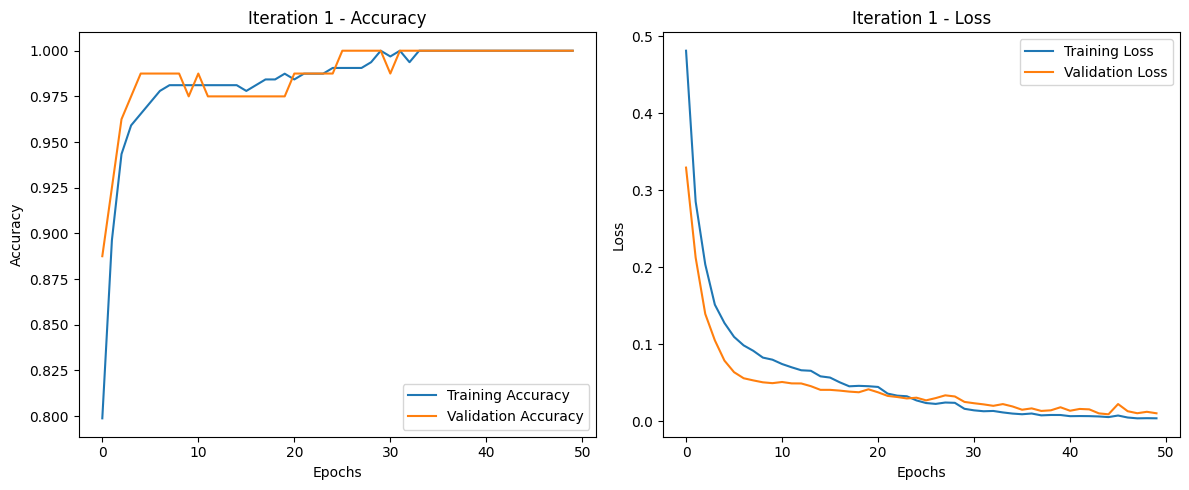

Iteration 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


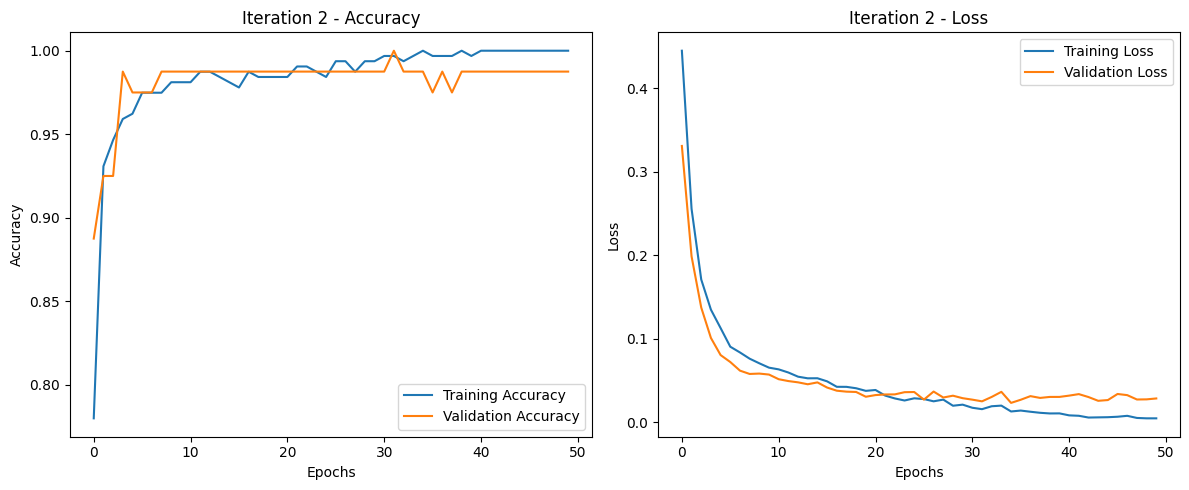

Iteration 3/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


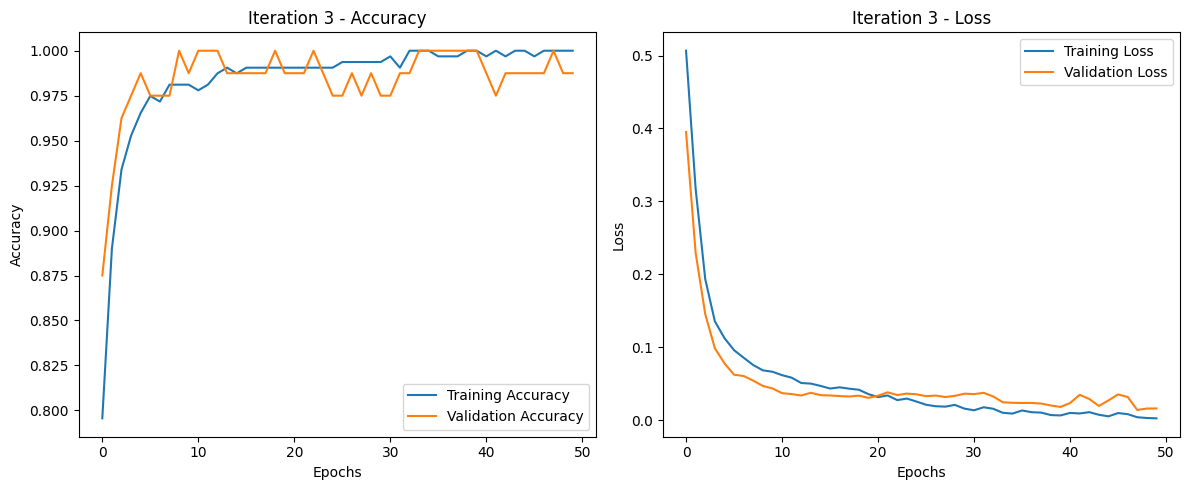


Average Classification Report:
0:
  precision: 0.9545
  recall: 0.9792
  f1-score: 0.9666
  support: 64.0000
1:
  precision: 0.9874
  recall: 0.9720
  f1-score: 0.9796
  support: 107.0000
accuracy: 0.9747
macro avg:
  precision: 0.9709
  recall: 0.9756
  f1-score: 0.9731
  support: 171.0000
weighted avg:
  precision: 0.9750
  recall: 0.9747
  f1-score: 0.9747
  support: 171.0000


In [ ]:
def piecewise_activation(x):
    return tf.where(x > 0, x, tf.sigmoid(x))

class PiecewiseActivation(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PiecewiseActivation, self).__init__(**kwargs)

    def call(self, inputs):
        return piecewise_activation(inputs)

# Load and preprocess the Iris dataset
iris_data = load_breast_cancer()
X_iris, y_iris = iris_data.data, iris_data.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = preprocess_data(X_iris, y_iris)

# Step 3: Build the model
def create_model(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation=PiecewiseActivation(), input_shape=(input_dim,)),
        tf.keras.layers.Dense(32, activation=PiecewiseActivation()),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and evaluate
def train_and_evaluate(num_iterations=3):
    reports = []
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        model = create_model(X_train_iris.shape[1], y_train_iris.shape[1])
        history = model.fit(
            X_train_iris, y_train_iris, epochs=50, batch_size=16, verbose=0, validation_split=0.2
        )

        # Evaluate
        predictions = model.predict(X_test_iris)
        y_test_labels = np.argmax(y_test_iris, axis=1)
        y_pred_labels = np.argmax(predictions, axis=1)

        # Collect classification report
        report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
        reports.append(report)

        # Plot training and validation accuracy for this iteration
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Iteration {iteration + 1} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training and validation loss for this iteration
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Iteration {iteration + 1} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Average classification report
    avg_report = {}
    for key in reports[0]:
        if isinstance(reports[0][key], dict):  # For class-specific metrics
            avg_report[key] = {
                metric: np.mean([r[key][metric] for r in reports if key in r and metric in r[key]])
                for metric in reports[0][key]
            }
        else:  # For overall metrics (e.g., 'accuracy')
            avg_report[key] = np.mean([r[key] for r in reports if key in r])

    print("\nAverage Classification Report:")
    for key, metrics in avg_report.items():
        if isinstance(metrics, dict):
            print(f"{key}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")
        else:
            print(f"{key}: {metrics:.4f}")

# Run the evaluation
train_and_evaluate()

**RELU-Swish**

Iteration 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


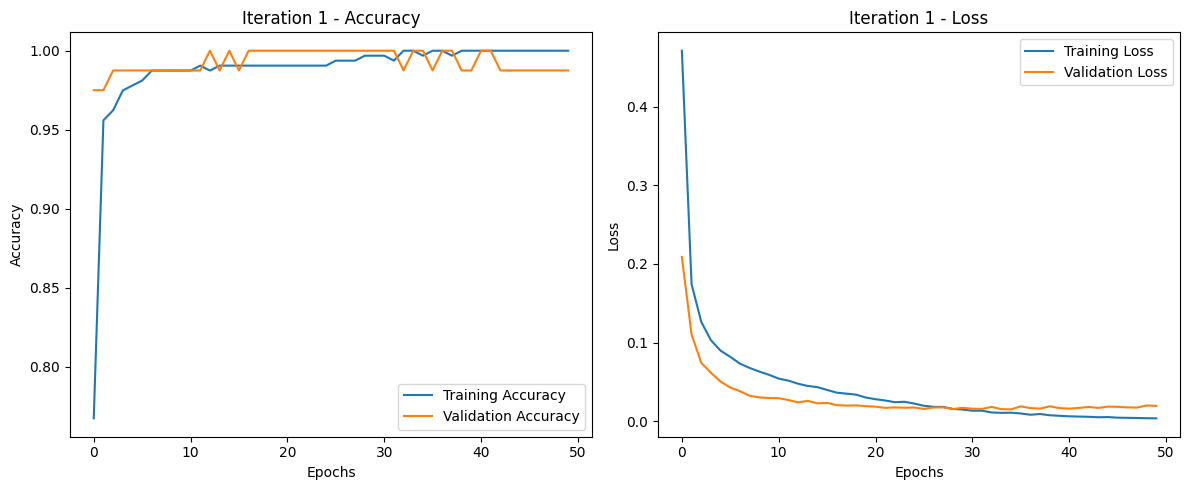

Iteration 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


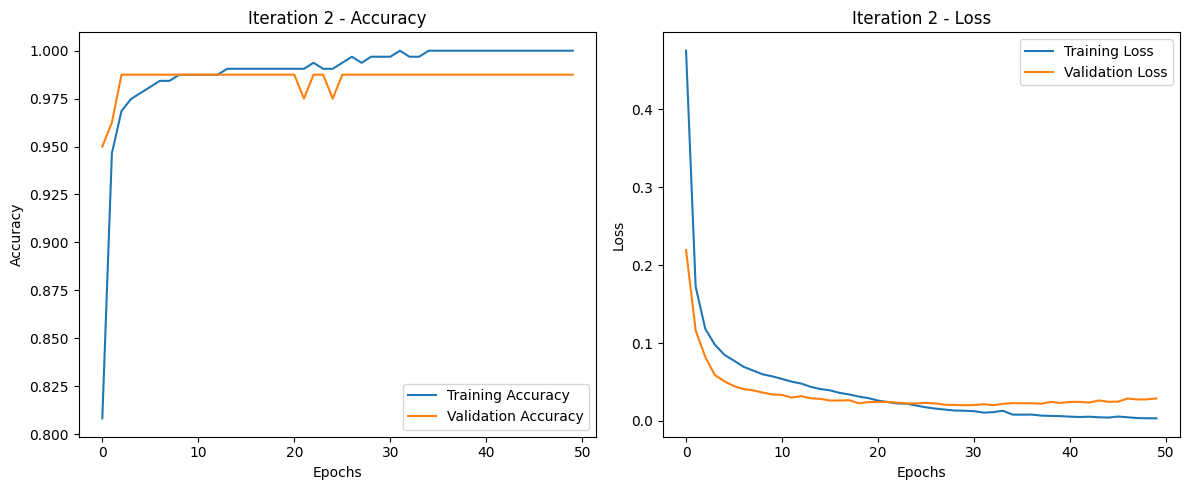

Iteration 3/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


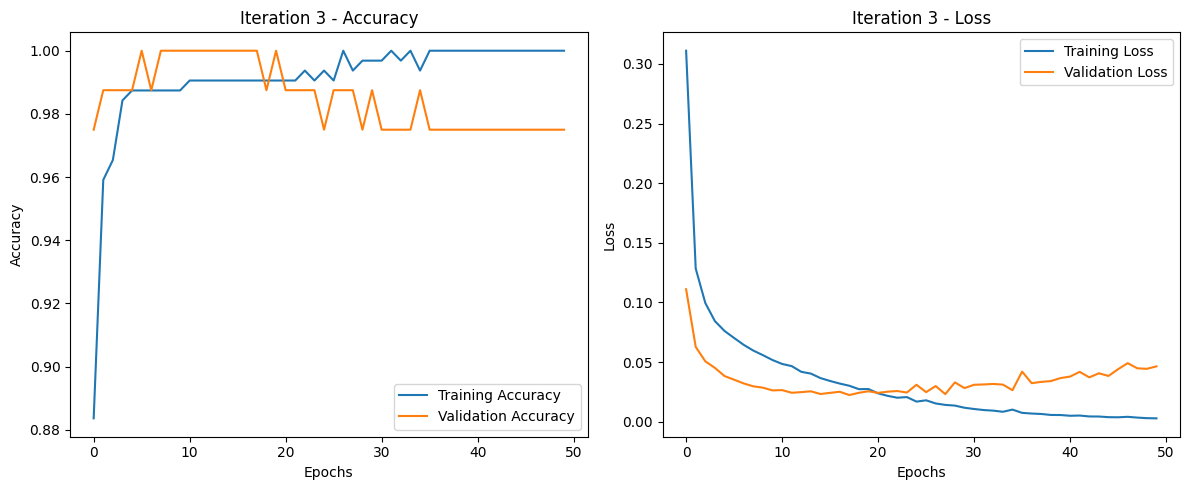


Average Classification Report:
0:
  precision: 0.9543
  recall: 0.9792
  f1-score: 0.9666
  support: 64.0000
1:
  precision: 0.9874
  recall: 0.9720
  f1-score: 0.9796
  support: 107.0000
accuracy: 0.9747
macro avg:
  precision: 0.9708
  recall: 0.9756
  f1-score: 0.9731
  support: 171.0000
weighted avg:
  precision: 0.9750
  recall: 0.9747
  f1-score: 0.9747
  support: 171.0000


In [ ]:
def piecewise_activation(x):
    return tf.where(x > 0, x, tf.keras.activations.swish(x))

class PiecewiseActivation(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PiecewiseActivation, self).__init__(**kwargs)

    def call(self, inputs):
        return piecewise_activation(inputs)

# Load and preprocess the Iris dataset
iris_data = load_breast_cancer()
X_iris, y_iris = iris_data.data, iris_data.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = preprocess_data(X_iris, y_iris)

# Step 3: Build the model
def create_model(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation=PiecewiseActivation(), input_shape=(input_dim,)),
        tf.keras.layers.Dense(32, activation=PiecewiseActivation()),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and evaluate
def train_and_evaluate(num_iterations=3):
    reports = []
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        model = create_model(X_train_iris.shape[1], y_train_iris.shape[1])
        history = model.fit(
            X_train_iris, y_train_iris, epochs=50, batch_size=16, verbose=0, validation_split=0.2
        )

        # Evaluate
        predictions = model.predict(X_test_iris)
        y_test_labels = np.argmax(y_test_iris, axis=1)
        y_pred_labels = np.argmax(predictions, axis=1)

        # Collect classification report
        report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
        reports.append(report)

        # Plot training and validation accuracy for this iteration
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Iteration {iteration + 1} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training and validation loss for this iteration
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Iteration {iteration + 1} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Average classification report
    avg_report = {}
    for key in reports[0]:
        if isinstance(reports[0][key], dict):  # For class-specific metrics
            avg_report[key] = {
                metric: np.mean([r[key][metric] for r in reports if key in r and metric in r[key]])
                for metric in reports[0][key]
            }
        else:  # For overall metrics (e.g., 'accuracy')
            avg_report[key] = np.mean([r[key] for r in reports if key in r])

    print("\nAverage Classification Report:")
    for key, metrics in avg_report.items():
        if isinstance(metrics, dict):
            print(f"{key}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")
        else:
            print(f"{key}: {metrics:.4f}")

# Run the evaluation
train_and_evaluate()

**RELU-softsign**

Iteration 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


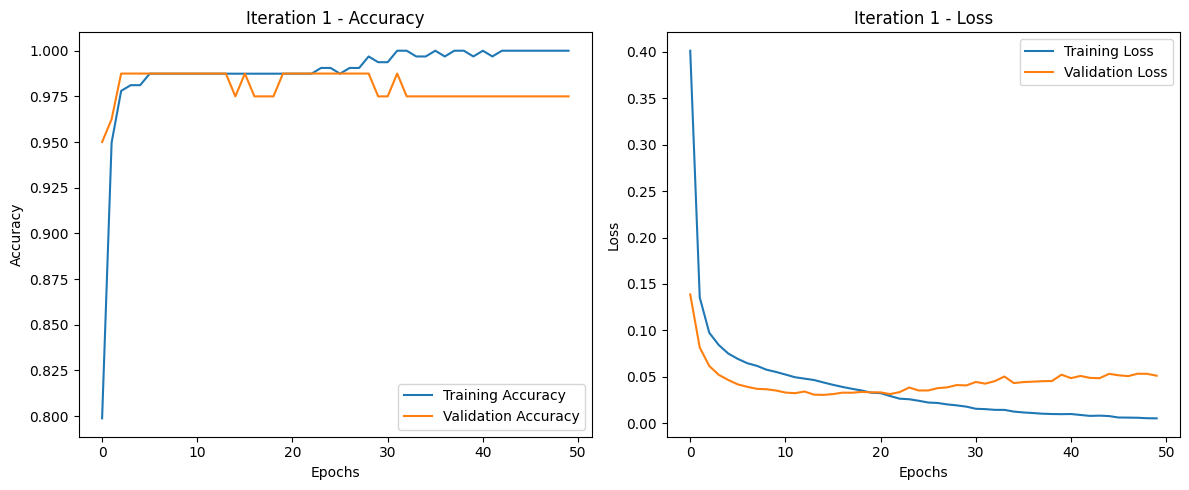

Iteration 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


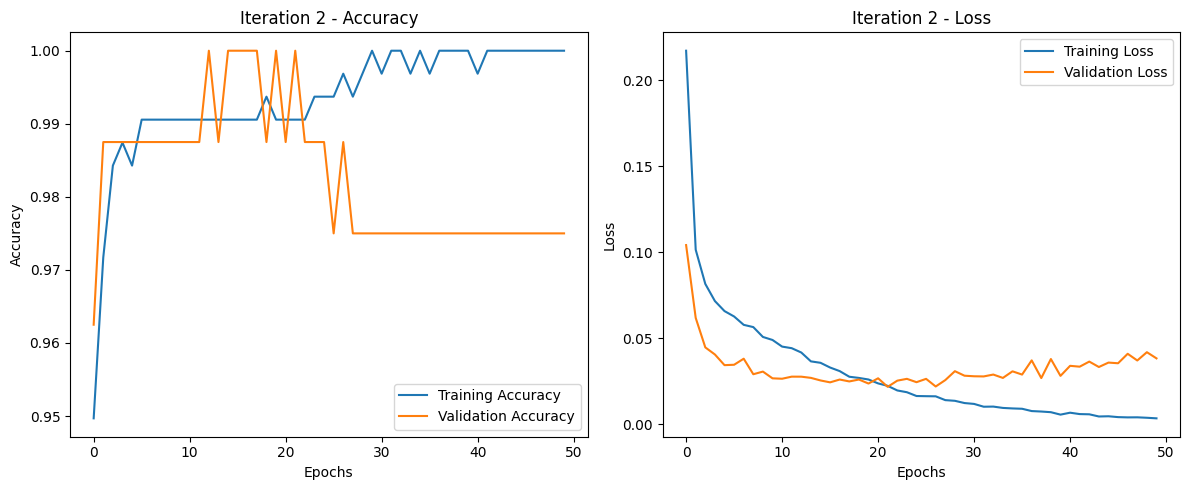

Iteration 3/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


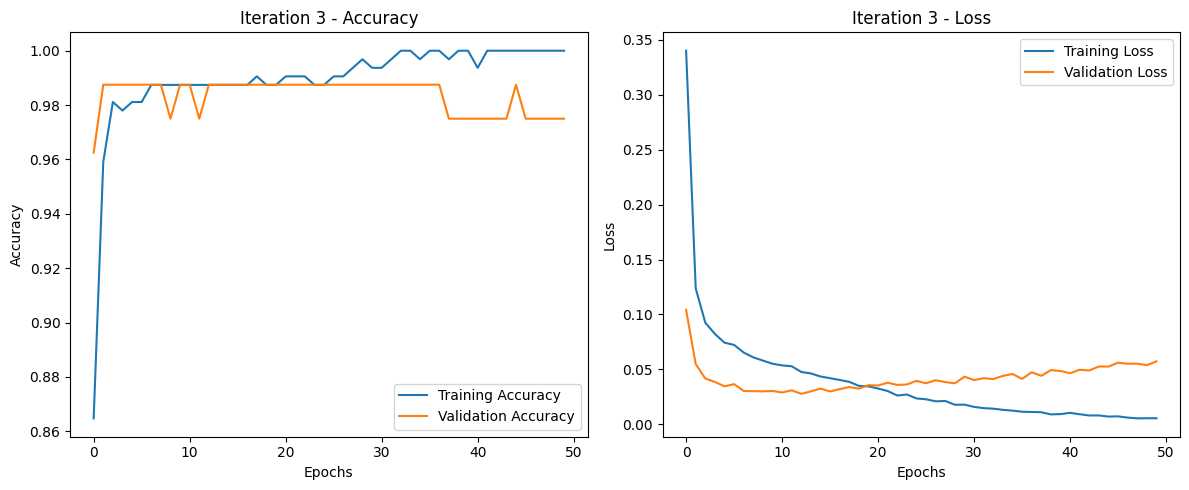


Average Classification Report:
0:
  precision: 0.9590
  recall: 0.9740
  f1-score: 0.9664
  support: 64.0000
1:
  precision: 0.9843
  recall: 0.9751
  f1-score: 0.9797
  support: 107.0000
accuracy: 0.9747
macro avg:
  precision: 0.9717
  recall: 0.9745
  f1-score: 0.9730
  support: 171.0000
weighted avg:
  precision: 0.9749
  recall: 0.9747
  f1-score: 0.9747
  support: 171.0000


In [ ]:
def piecewise_activation(x):
    return tf.where(x > 0, x, tf.keras.activations.softsign(x))

class PiecewiseActivation(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PiecewiseActivation, self).__init__(**kwargs)

    def call(self, inputs):
        return piecewise_activation(inputs)

# Load and preprocess the Iris dataset
iris_data = load_breast_cancer()
X_iris, y_iris = iris_data.data, iris_data.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = preprocess_data(X_iris, y_iris)

# Step 3: Build the model
def create_model(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation=PiecewiseActivation(), input_shape=(input_dim,)),
        tf.keras.layers.Dense(32, activation=PiecewiseActivation()),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and evaluate
def train_and_evaluate(num_iterations=3):
    reports = []
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        model = create_model(X_train_iris.shape[1], y_train_iris.shape[1])
        history = model.fit(
            X_train_iris, y_train_iris, epochs=50, batch_size=16, verbose=0, validation_split=0.2
        )

        # Evaluate
        predictions = model.predict(X_test_iris)
        y_test_labels = np.argmax(y_test_iris, axis=1)
        y_pred_labels = np.argmax(predictions, axis=1)

        # Collect classification report
        report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
        reports.append(report)

        # Plot training and validation accuracy for this iteration
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Iteration {iteration + 1} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training and validation loss for this iteration
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Iteration {iteration + 1} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Average classification report
    avg_report = {}
    for key in reports[0]:
        if isinstance(reports[0][key], dict):  # For class-specific metrics
            avg_report[key] = {
                metric: np.mean([r[key][metric] for r in reports if key in r and metric in r[key]])
                for metric in reports[0][key]
            }
        else:  # For overall metrics (e.g., 'accuracy')
            avg_report[key] = np.mean([r[key] for r in reports if key in r])

    print("\nAverage Classification Report:")
    for key, metrics in avg_report.items():
        if isinstance(metrics, dict):
            print(f"{key}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")
        else:
            print(f"{key}: {metrics:.4f}")

# Run the evaluation
train_and_evaluate()

**RELU-softplus**

Iteration 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


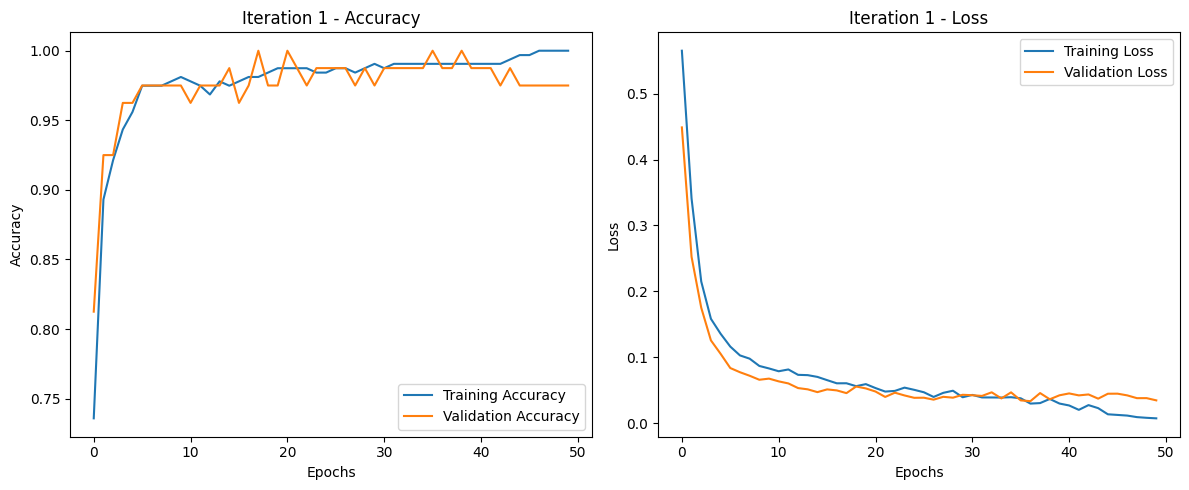

Iteration 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


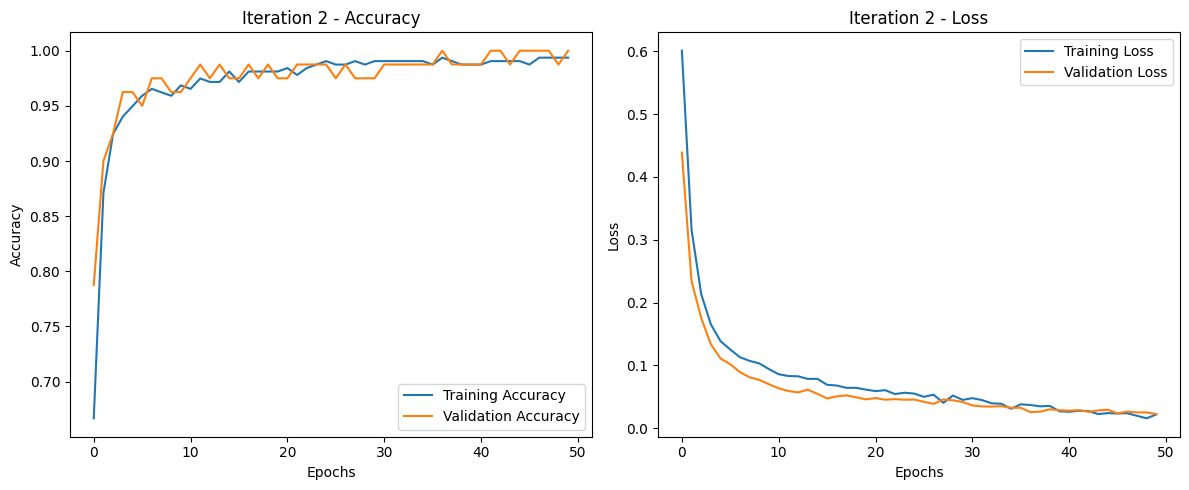

Iteration 3/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


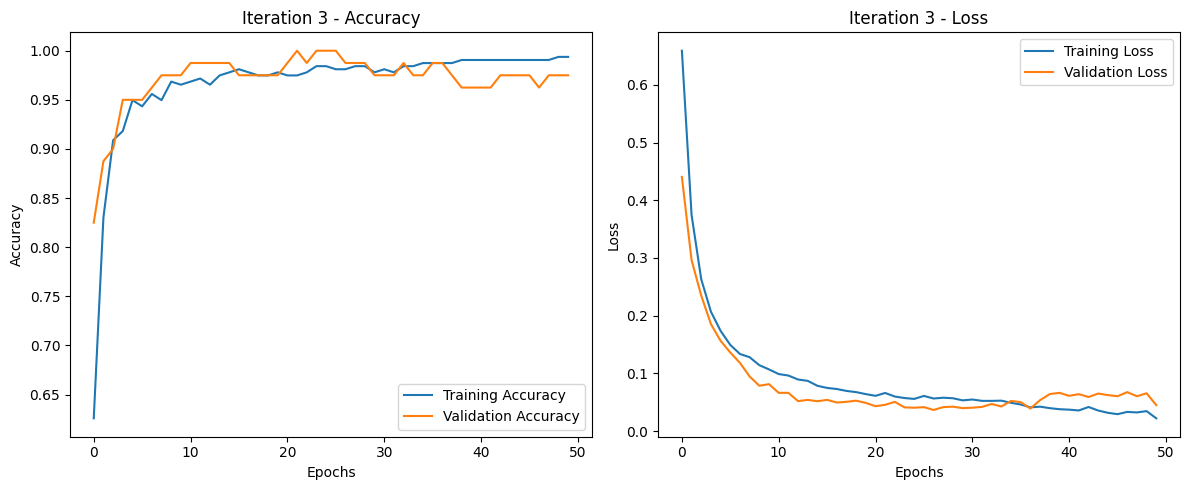


Average Classification Report:
0:
  precision: 0.9163
  recall: 0.9635
  f1-score: 0.9392
  support: 64.0000
1:
  precision: 0.9776
  recall: 0.9470
  f1-score: 0.9620
  support: 107.0000
accuracy: 0.9532
macro avg:
  precision: 0.9469
  recall: 0.9553
  f1-score: 0.9506
  support: 171.0000
weighted avg:
  precision: 0.9546
  recall: 0.9532
  f1-score: 0.9534
  support: 171.0000


In [ ]:
def piecewise_activation(x):
    return tf.where(x > 0, x, tf.keras.activations.softplus(x))

class PiecewiseActivation(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PiecewiseActivation, self).__init__(**kwargs)

    def call(self, inputs):
        return piecewise_activation(inputs)

# Load and preprocess the Iris dataset
iris_data = load_breast_cancer()
X_iris, y_iris = iris_data.data, iris_data.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = preprocess_data(X_iris, y_iris)

# Step 3: Build the model
def create_model(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation=PiecewiseActivation(), input_shape=(input_dim,)),
        tf.keras.layers.Dense(32, activation=PiecewiseActivation()),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and evaluate
def train_and_evaluate(num_iterations=3):
    reports = []
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        model = create_model(X_train_iris.shape[1], y_train_iris.shape[1])
        history = model.fit(
            X_train_iris, y_train_iris, epochs=50, batch_size=16, verbose=0, validation_split=0.2
        )

        # Evaluate
        predictions = model.predict(X_test_iris)
        y_test_labels = np.argmax(y_test_iris, axis=1)
        y_pred_labels = np.argmax(predictions, axis=1)

        # Collect classification report
        report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
        reports.append(report)

        # Plot training and validation accuracy for this iteration
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Iteration {iteration + 1} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training and validation loss for this iteration
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Iteration {iteration + 1} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Average classification report
    avg_report = {}
    for key in reports[0]:
        if isinstance(reports[0][key], dict):  # For class-specific metrics
            avg_report[key] = {
                metric: np.mean([r[key][metric] for r in reports if key in r and metric in r[key]])
                for metric in reports[0][key]
            }
        else:  # For overall metrics (e.g., 'accuracy')
            avg_report[key] = np.mean([r[key] for r in reports if key in r])

    print("\nAverage Classification Report:")
    for key, metrics in avg_report.items():
        if isinstance(metrics, dict):
            print(f"{key}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")
        else:
            print(f"{key}: {metrics:.4f}")

# Run the evaluation
train_and_evaluate()

**RELU-Softmax**

Iteration 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


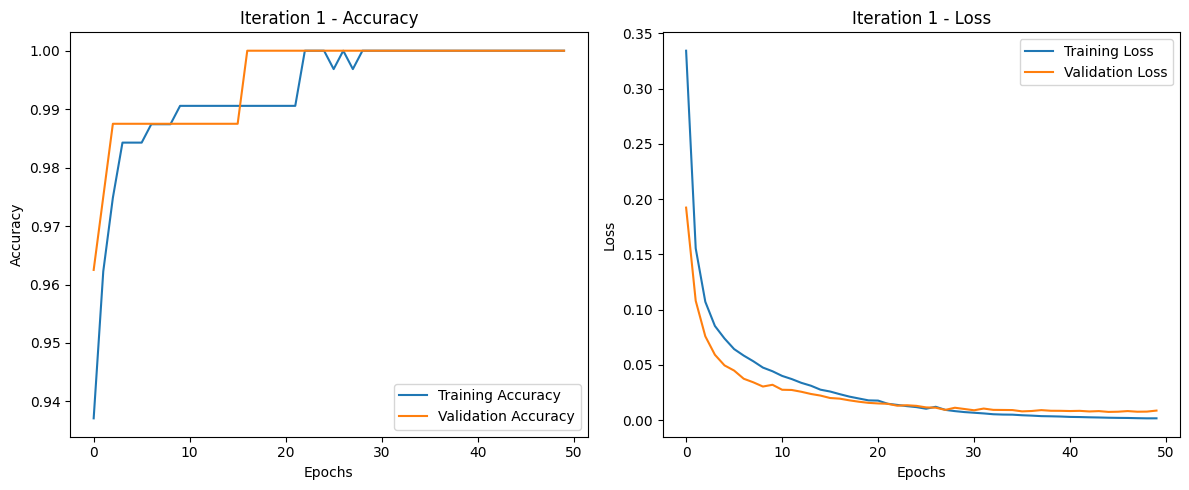

Iteration 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


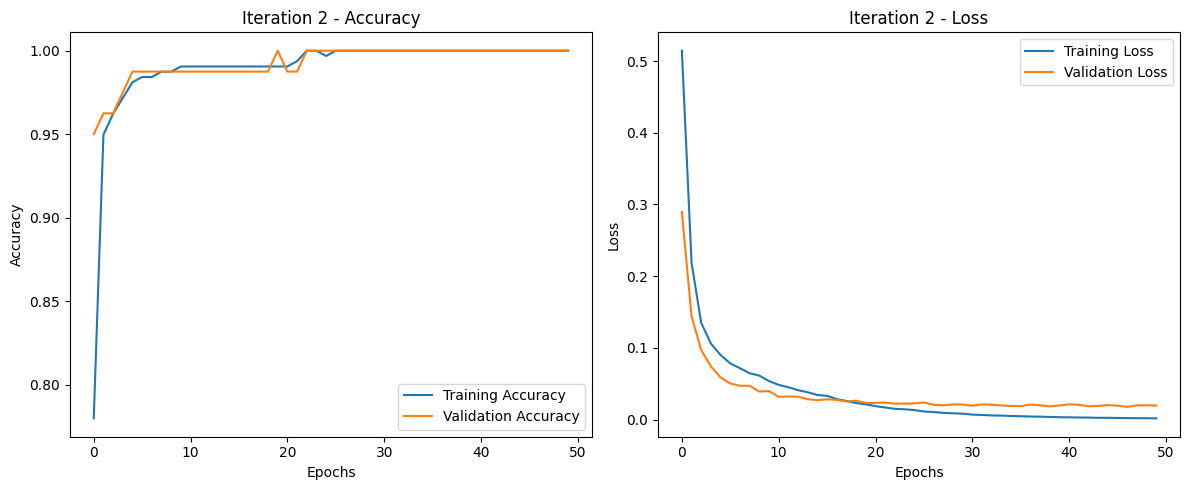

Iteration 3/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


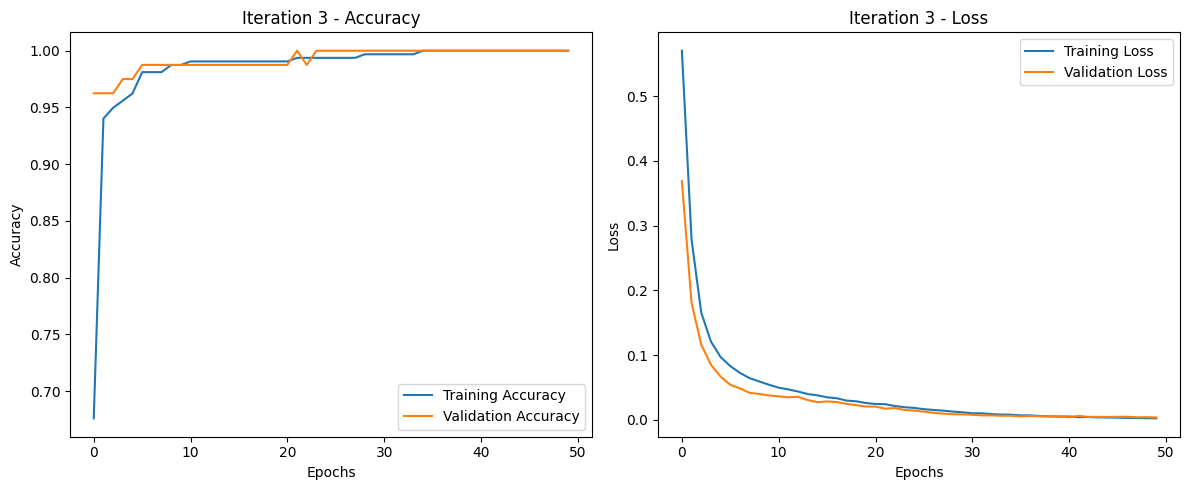


Average Classification Report:
0:
  precision: 0.9547
  recall: 0.9844
  f1-score: 0.9693
  support: 64.0000
1:
  precision: 0.9905
  recall: 0.9720
  f1-score: 0.9811
  support: 107.0000
accuracy: 0.9766
macro avg:
  precision: 0.9726
  recall: 0.9782
  f1-score: 0.9752
  support: 171.0000
weighted avg:
  precision: 0.9771
  recall: 0.9766
  f1-score: 0.9767
  support: 171.0000


In [ ]:
def piecewise_activation(x):
    return tf.where(x > 0, x, tf.keras.activations.softmax(x))

class PiecewiseActivation(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PiecewiseActivation, self).__init__(**kwargs)

    def call(self, inputs):
        return piecewise_activation(inputs)

# Load and preprocess the Iris dataset
iris_data = load_breast_cancer()
X_iris, y_iris = iris_data.data, iris_data.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = preprocess_data(X_iris, y_iris)

# Step 3: Build the model
def create_model(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation=PiecewiseActivation(), input_shape=(input_dim,)),
        tf.keras.layers.Dense(32, activation=PiecewiseActivation()),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and evaluate
def train_and_evaluate(num_iterations=3):
    reports = []
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        model = create_model(X_train_iris.shape[1], y_train_iris.shape[1])
        history = model.fit(
            X_train_iris, y_train_iris, epochs=50, batch_size=16, verbose=0, validation_split=0.2
        )

        # Evaluate
        predictions = model.predict(X_test_iris)
        y_test_labels = np.argmax(y_test_iris, axis=1)
        y_pred_labels = np.argmax(predictions, axis=1)

        # Collect classification report
        report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
        reports.append(report)

        # Plot training and validation accuracy for this iteration
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Iteration {iteration + 1} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training and validation loss for this iteration
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Iteration {iteration + 1} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Average classification report
    avg_report = {}
    for key in reports[0]:
        if isinstance(reports[0][key], dict):  # For class-specific metrics
            avg_report[key] = {
                metric: np.mean([r[key][metric] for r in reports if key in r and metric in r[key]])
                for metric in reports[0][key]
            }
        else:  # For overall metrics (e.g., 'accuracy')
            avg_report[key] = np.mean([r[key] for r in reports if key in r])

    print("\nAverage Classification Report:")
    for key, metrics in avg_report.items():
        if isinstance(metrics, dict):
            print(f"{key}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")
        else:
            print(f"{key}: {metrics:.4f}")

# Run the evaluation
train_and_evaluate()

**RELU-SELU**

Iteration 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


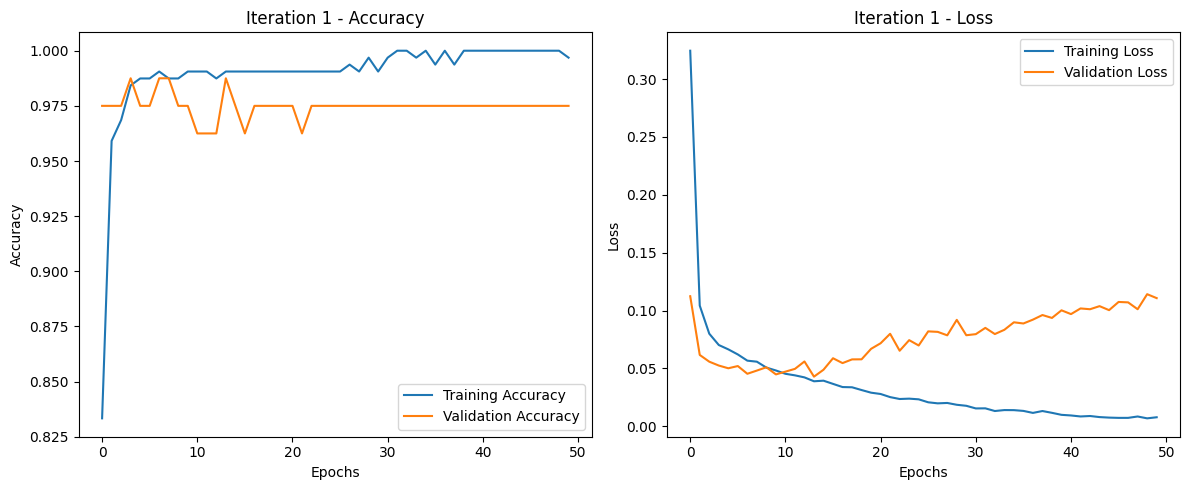

Iteration 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


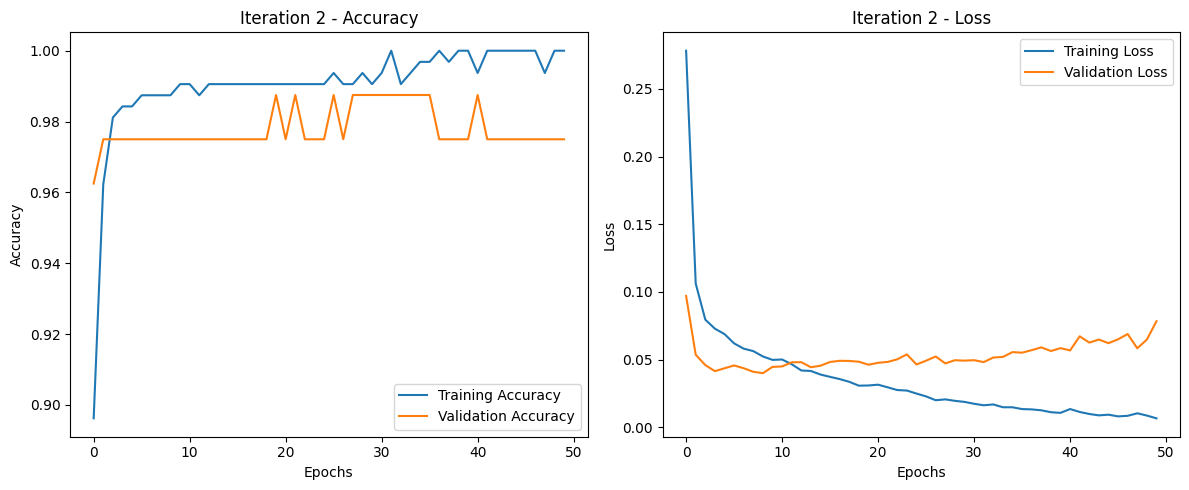

Iteration 3/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


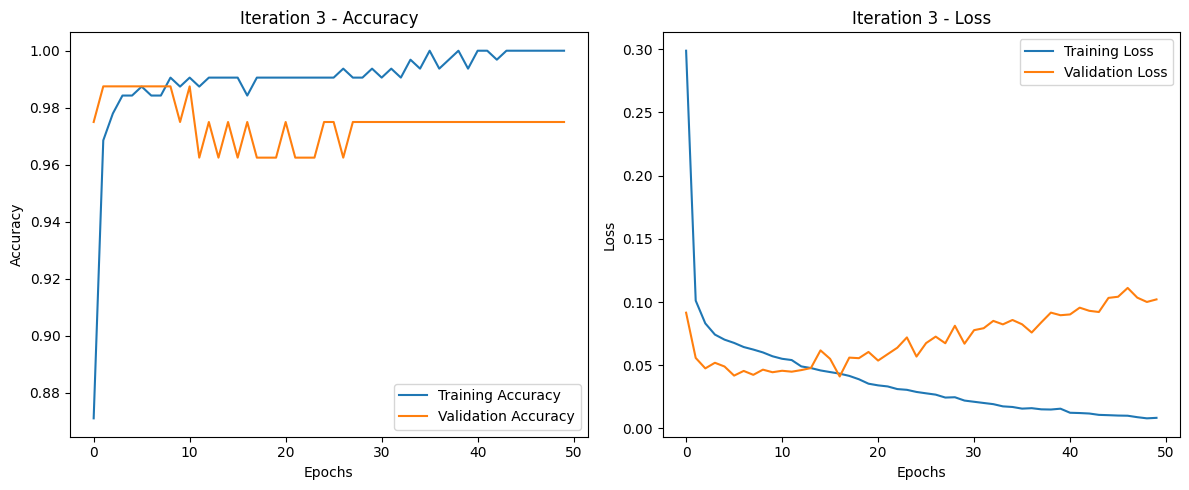


Average Classification Report:
0:
  precision: 0.9735
  recall: 0.9583
  f1-score: 0.9659
  support: 64.0000
1:
  precision: 0.9753
  recall: 0.9844
  f1-score: 0.9798
  support: 107.0000
accuracy: 0.9747
macro avg:
  precision: 0.9744
  recall: 0.9714
  f1-score: 0.9729
  support: 171.0000
weighted avg:
  precision: 0.9746
  recall: 0.9747
  f1-score: 0.9746
  support: 171.0000


In [ ]:
def piecewise_activation(x):
    return tf.where(x > 0, x, tf.keras.activations.selu(x))

class PiecewiseActivation(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PiecewiseActivation, self).__init__(**kwargs)

    def call(self, inputs):
        return piecewise_activation(inputs)

# Load and preprocess the Iris dataset
iris_data = load_breast_cancer()
X_iris, y_iris = iris_data.data, iris_data.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = preprocess_data(X_iris, y_iris)

# Step 3: Build the model
def create_model(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation=PiecewiseActivation(), input_shape=(input_dim,)),
        tf.keras.layers.Dense(32, activation=PiecewiseActivation()),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and evaluate
def train_and_evaluate(num_iterations=3):
    reports = []
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        model = create_model(X_train_iris.shape[1], y_train_iris.shape[1])
        history = model.fit(
            X_train_iris, y_train_iris, epochs=50, batch_size=16, verbose=0, validation_split=0.2
        )

        # Evaluate
        predictions = model.predict(X_test_iris)
        y_test_labels = np.argmax(y_test_iris, axis=1)
        y_pred_labels = np.argmax(predictions, axis=1)

        # Collect classification report
        report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
        reports.append(report)

        # Plot training and validation accuracy for this iteration
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Iteration {iteration + 1} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training and validation loss for this iteration
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Iteration {iteration + 1} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Average classification report
    avg_report = {}
    for key in reports[0]:
        if isinstance(reports[0][key], dict):  # For class-specific metrics
            avg_report[key] = {
                metric: np.mean([r[key][metric] for r in reports if key in r and metric in r[key]])
                for metric in reports[0][key]
            }
        else:  # For overall metrics (e.g., 'accuracy')
            avg_report[key] = np.mean([r[key] for r in reports if key in r])

    print("\nAverage Classification Report:")
    for key, metrics in avg_report.items():
        if isinstance(metrics, dict):
            print(f"{key}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")
        else:
            print(f"{key}: {metrics:.4f}")

# Run the evaluation
train_and_evaluate()

**RELU-Mish**

Iteration 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


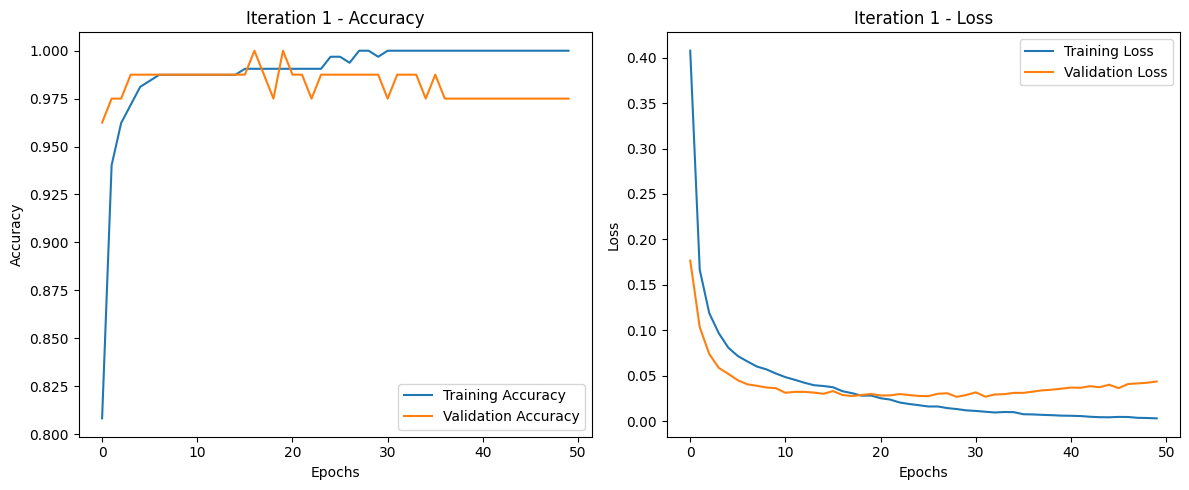

Iteration 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


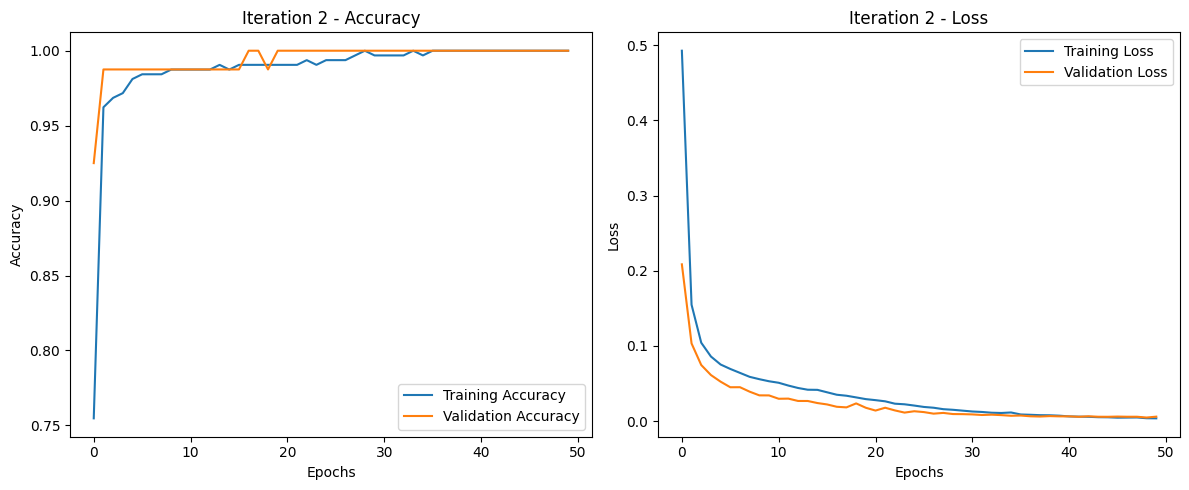

Iteration 3/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


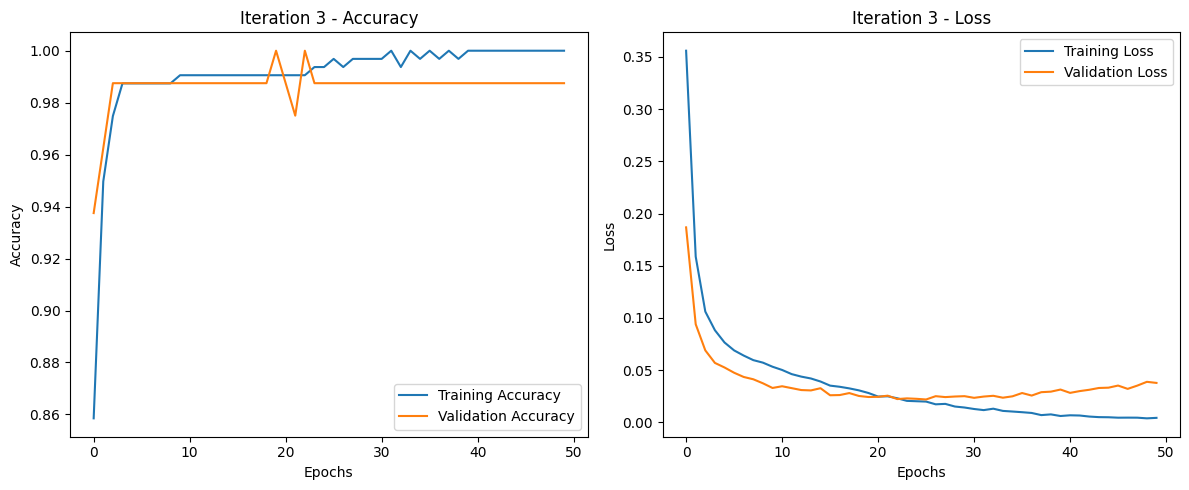


Average Classification Report:
0:
  precision: 0.9594
  recall: 0.9844
  f1-score: 0.9717
  support: 64.0000
1:
  precision: 0.9905
  recall: 0.9751
  f1-score: 0.9827
  support: 107.0000
accuracy: 0.9786
macro avg:
  precision: 0.9750
  recall: 0.9797
  f1-score: 0.9772
  support: 171.0000
weighted avg:
  precision: 0.9789
  recall: 0.9786
  f1-score: 0.9786
  support: 171.0000


In [ ]:
def piecewise_activation(x):
    return tf.where(x > 0, x, tf.keras.activations.mish(x))

class PiecewiseActivation(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PiecewiseActivation, self).__init__(**kwargs)

    def call(self, inputs):
        return piecewise_activation(inputs)

# Load and preprocess the Iris dataset
iris_data = load_breast_cancer()
X_iris, y_iris = iris_data.data, iris_data.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = preprocess_data(X_iris, y_iris)

# Step 3: Build the model
def create_model(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation=PiecewiseActivation(), input_shape=(input_dim,)),
        tf.keras.layers.Dense(32, activation=PiecewiseActivation()),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and evaluate
def train_and_evaluate(num_iterations=3):
    reports = []
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        model = create_model(X_train_iris.shape[1], y_train_iris.shape[1])
        history = model.fit(
            X_train_iris, y_train_iris, epochs=50, batch_size=16, verbose=0, validation_split=0.2
        )

        # Evaluate
        predictions = model.predict(X_test_iris)
        y_test_labels = np.argmax(y_test_iris, axis=1)
        y_pred_labels = np.argmax(predictions, axis=1)

        # Collect classification report
        report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
        reports.append(report)

        # Plot training and validation accuracy for this iteration
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Iteration {iteration + 1} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training and validation loss for this iteration
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Iteration {iteration + 1} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Average classification report
    avg_report = {}
    for key in reports[0]:
        if isinstance(reports[0][key], dict):  # For class-specific metrics
            avg_report[key] = {
                metric: np.mean([r[key][metric] for r in reports if key in r and metric in r[key]])
                for metric in reports[0][key]
            }
        else:  # For overall metrics (e.g., 'accuracy')
            avg_report[key] = np.mean([r[key] for r in reports if key in r])

    print("\nAverage Classification Report:")
    for key, metrics in avg_report.items():
        if isinstance(metrics, dict):
            print(f"{key}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")
        else:
            print(f"{key}: {metrics:.4f}")

# Run the evaluation
train_and_evaluate()

**RELU-linear**

Iteration 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


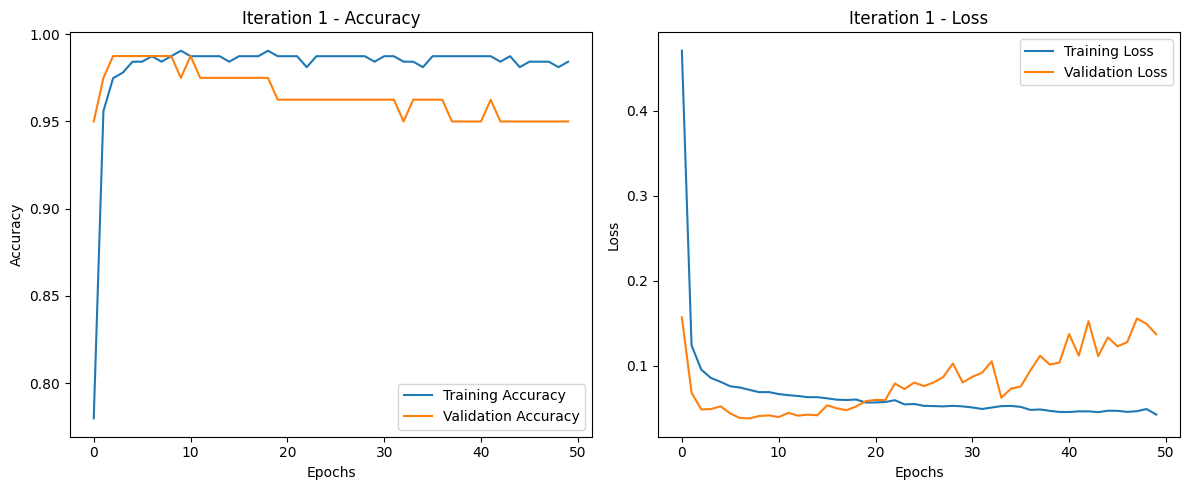

Iteration 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


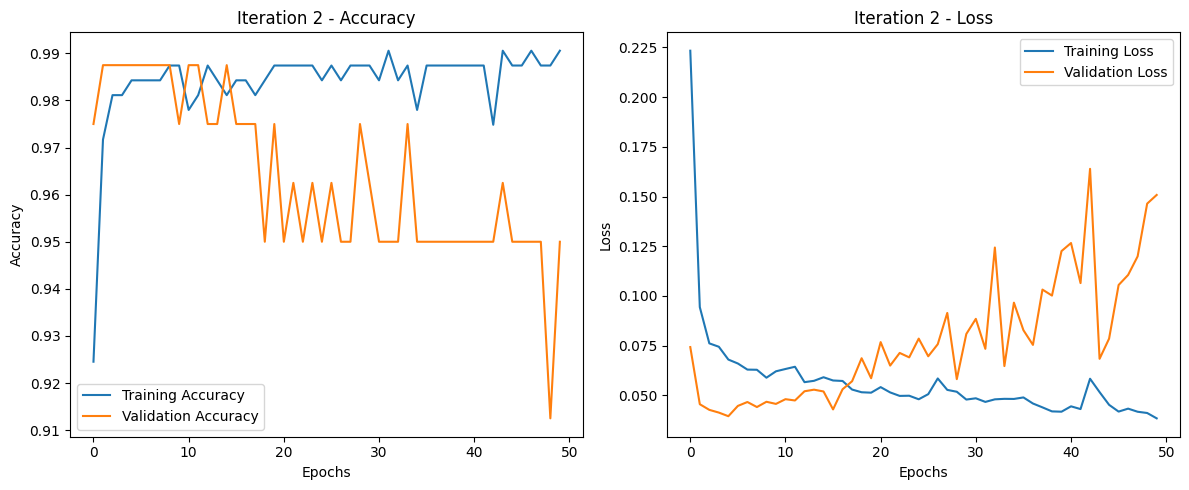

Iteration 3/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


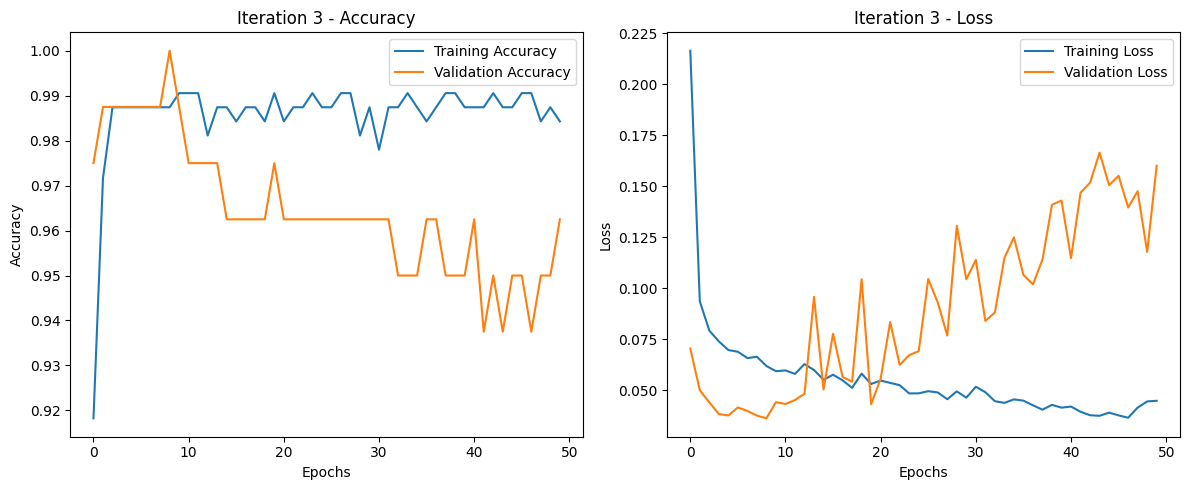


Average Classification Report:
0:
  precision: 0.9946
  recall: 0.9583
  f1-score: 0.9761
  support: 64.0000
1:
  precision: 0.9756
  recall: 0.9969
  f1-score: 0.9861
  support: 107.0000
accuracy: 0.9825
macro avg:
  precision: 0.9851
  recall: 0.9776
  f1-score: 0.9811
  support: 171.0000
weighted avg:
  precision: 0.9827
  recall: 0.9825
  f1-score: 0.9824
  support: 171.0000


In [ ]:
def piecewise_activation(x):
    return tf.where(x > 0, x, tf.keras.activations.linear(x))

class PiecewiseActivation(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PiecewiseActivation, self).__init__(**kwargs)

    def call(self, inputs):
        return piecewise_activation(inputs)

# Load and preprocess the Iris dataset
iris_data = load_breast_cancer()
X_iris, y_iris = iris_data.data, iris_data.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = preprocess_data(X_iris, y_iris)

# Step 3: Build the model
def create_model(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation=PiecewiseActivation(), input_shape=(input_dim,)),
        tf.keras.layers.Dense(32, activation=PiecewiseActivation()),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and evaluate
def train_and_evaluate(num_iterations=3):
    reports = []
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        model = create_model(X_train_iris.shape[1], y_train_iris.shape[1])
        history = model.fit(
            X_train_iris, y_train_iris, epochs=50, batch_size=16, verbose=0, validation_split=0.2
        )

        # Evaluate
        predictions = model.predict(X_test_iris)
        y_test_labels = np.argmax(y_test_iris, axis=1)
        y_pred_labels = np.argmax(predictions, axis=1)

        # Collect classification report
        report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
        reports.append(report)

        # Plot training and validation accuracy for this iteration
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Iteration {iteration + 1} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training and validation loss for this iteration
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Iteration {iteration + 1} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Average classification report
    avg_report = {}
    for key in reports[0]:
        if isinstance(reports[0][key], dict):  # For class-specific metrics
            avg_report[key] = {
                metric: np.mean([r[key][metric] for r in reports if key in r and metric in r[key]])
                for metric in reports[0][key]
            }
        else:  # For overall metrics (e.g., 'accuracy')
            avg_report[key] = np.mean([r[key] for r in reports if key in r])

    print("\nAverage Classification Report:")
    for key, metrics in avg_report.items():
        if isinstance(metrics, dict):
            print(f"{key}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")
        else:
            print(f"{key}: {metrics:.4f}")

# Run the evaluation
train_and_evaluate()

**RELU-LeakyRELU**

Iteration 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


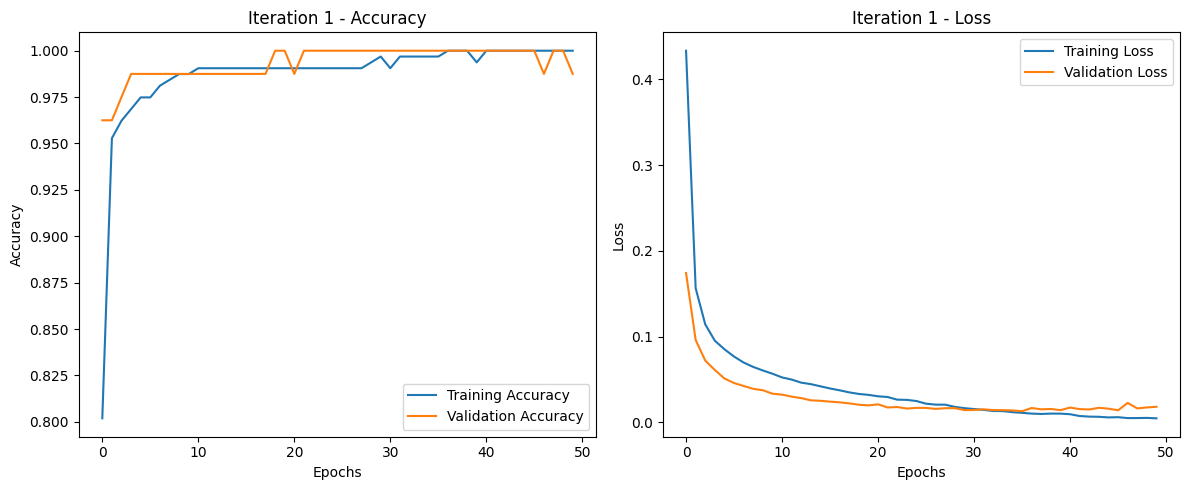

Iteration 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


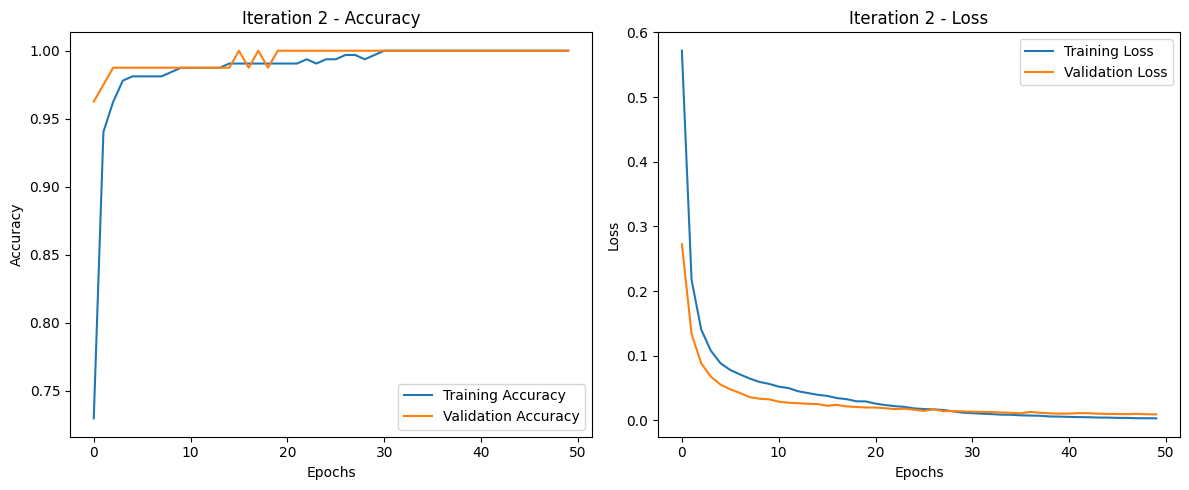

Iteration 3/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


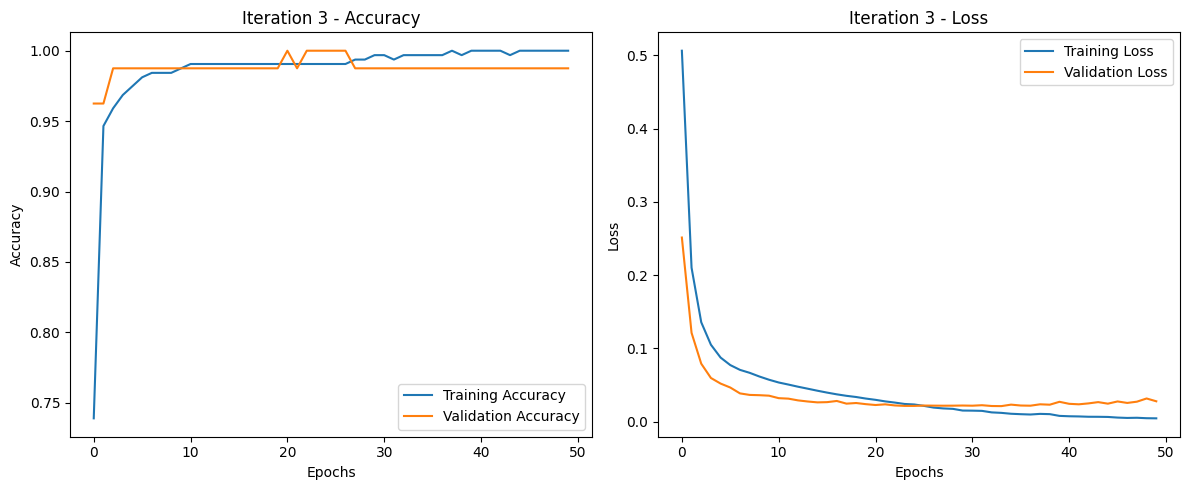


Average Classification Report:
0:
  precision: 0.9594
  recall: 0.9844
  f1-score: 0.9717
  support: 64.0000
1:
  precision: 0.9905
  recall: 0.9751
  f1-score: 0.9827
  support: 107.0000
accuracy: 0.9786
macro avg:
  precision: 0.9750
  recall: 0.9797
  f1-score: 0.9772
  support: 171.0000
weighted avg:
  precision: 0.9789
  recall: 0.9786
  f1-score: 0.9786
  support: 171.0000


In [ ]:
def piecewise_activation(x):
    return tf.where(x > 0, x, tf.keras.activations.leaky_relu(x))

class PiecewiseActivation(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PiecewiseActivation, self).__init__(**kwargs)

    def call(self, inputs):
        return piecewise_activation(inputs)

# Load and preprocess the Iris dataset
iris_data = load_breast_cancer()
X_iris, y_iris = iris_data.data, iris_data.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = preprocess_data(X_iris, y_iris)

# Step 3: Build the model
def create_model(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation=PiecewiseActivation(), input_shape=(input_dim,)),
        tf.keras.layers.Dense(32, activation=PiecewiseActivation()),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and evaluate
def train_and_evaluate(num_iterations=3):
    reports = []
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        model = create_model(X_train_iris.shape[1], y_train_iris.shape[1])
        history = model.fit(
            X_train_iris, y_train_iris, epochs=50, batch_size=16, verbose=0, validation_split=0.2
        )

        # Evaluate
        predictions = model.predict(X_test_iris)
        y_test_labels = np.argmax(y_test_iris, axis=1)
        y_pred_labels = np.argmax(predictions, axis=1)

        # Collect classification report
        report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
        reports.append(report)

        # Plot training and validation accuracy for this iteration
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Iteration {iteration + 1} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training and validation loss for this iteration
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Iteration {iteration + 1} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Average classification report
    avg_report = {}
    for key in reports[0]:
        if isinstance(reports[0][key], dict):  # For class-specific metrics
            avg_report[key] = {
                metric: np.mean([r[key][metric] for r in reports if key in r and metric in r[key]])
                for metric in reports[0][key]
            }
        else:  # For overall metrics (e.g., 'accuracy')
            avg_report[key] = np.mean([r[key] for r in reports if key in r])

    print("\nAverage Classification Report:")
    for key, metrics in avg_report.items():
        if isinstance(metrics, dict):
            print(f"{key}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")
        else:
            print(f"{key}: {metrics:.4f}")

# Run the evaluation
train_and_evaluate()

**RELU-Expo**

Iteration 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


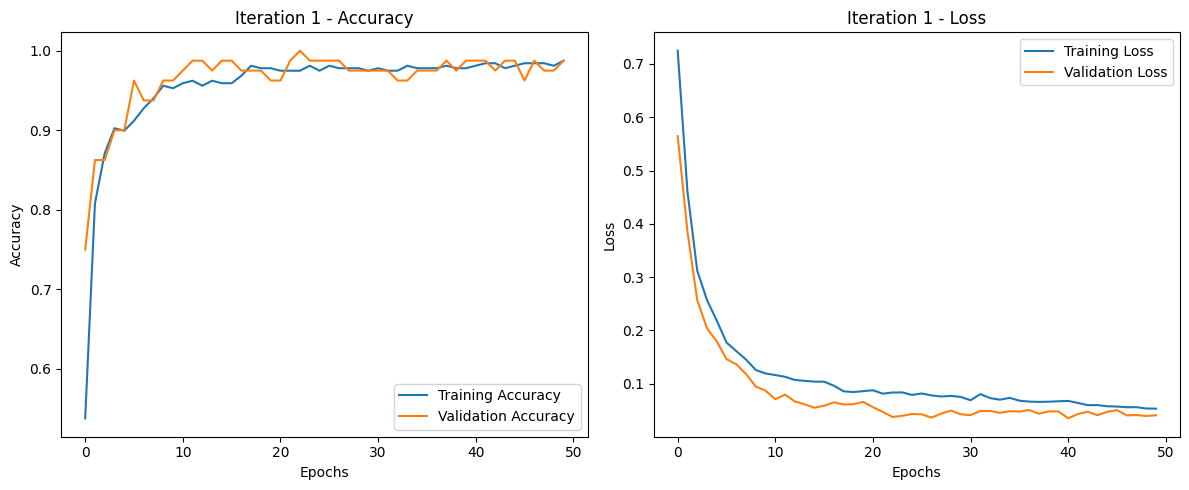

Iteration 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


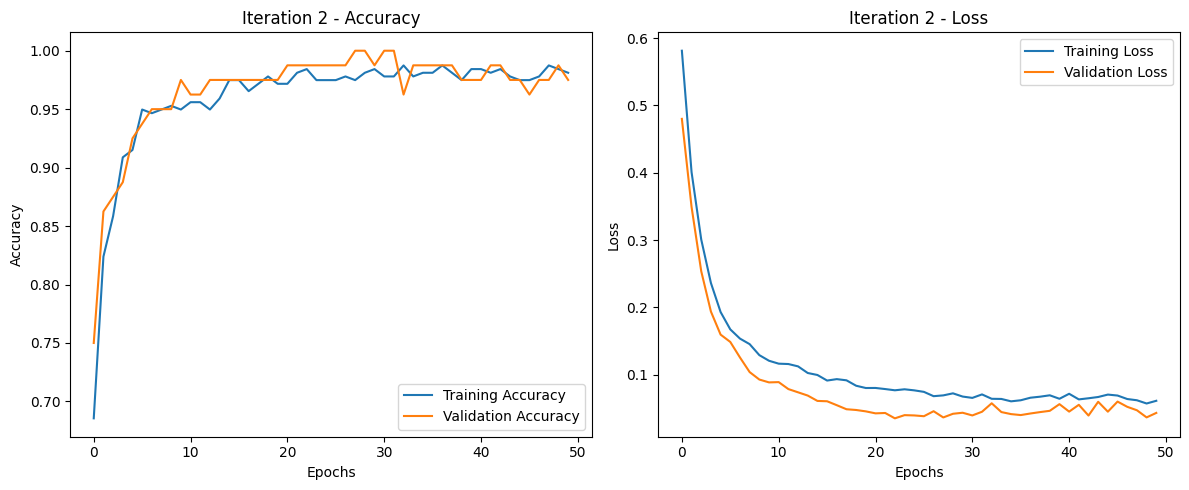

Iteration 3/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


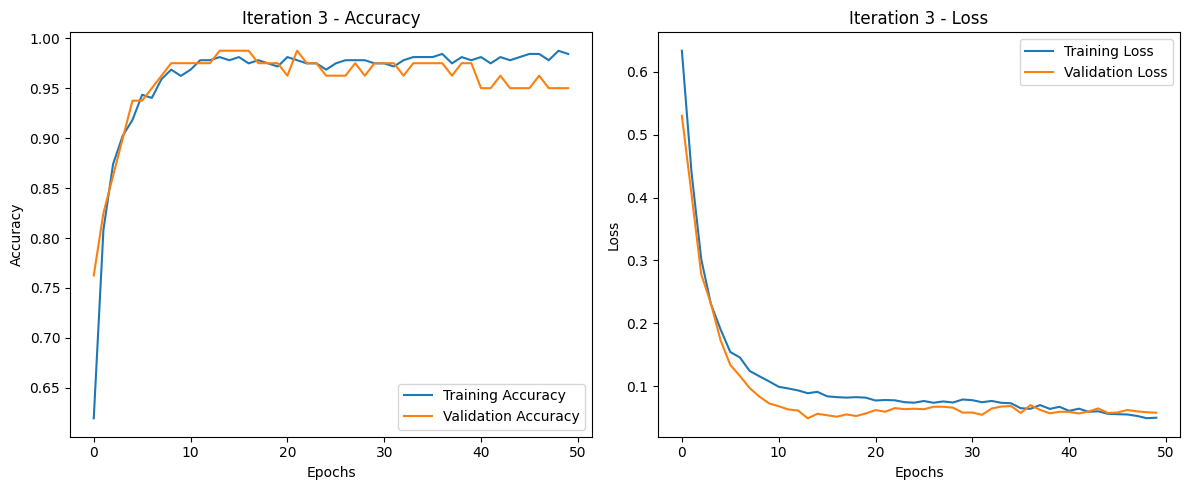


Average Classification Report:
0:
  precision: 0.9254
  recall: 0.9688
  f1-score: 0.9466
  support: 64.0000
1:
  precision: 0.9808
  recall: 0.9533
  f1-score: 0.9668
  support: 107.0000
accuracy: 0.9591
macro avg:
  precision: 0.9531
  recall: 0.9610
  f1-score: 0.9567
  support: 171.0000
weighted avg:
  precision: 0.9600
  recall: 0.9591
  f1-score: 0.9592
  support: 171.0000


In [ ]:
def piecewise_activation(x):
    return tf.where(x > 0, x, tf.keras.activations.exponential(x))

class PiecewiseActivation(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PiecewiseActivation, self).__init__(**kwargs)

    def call(self, inputs):
        return piecewise_activation(inputs)

# Load and preprocess the Iris dataset
iris_data = load_breast_cancer()
X_iris, y_iris = iris_data.data, iris_data.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = preprocess_data(X_iris, y_iris)

# Step 3: Build the model
def create_model(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation=PiecewiseActivation(), input_shape=(input_dim,)),
        tf.keras.layers.Dense(32, activation=PiecewiseActivation()),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and evaluate
def train_and_evaluate(num_iterations=3):
    reports = []
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        model = create_model(X_train_iris.shape[1], y_train_iris.shape[1])
        history = model.fit(
            X_train_iris, y_train_iris, epochs=50, batch_size=16, verbose=0, validation_split=0.2
        )

        # Evaluate
        predictions = model.predict(X_test_iris)
        y_test_labels = np.argmax(y_test_iris, axis=1)
        y_pred_labels = np.argmax(predictions, axis=1)

        # Collect classification report
        report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
        reports.append(report)

        # Plot training and validation accuracy for this iteration
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Iteration {iteration + 1} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training and validation loss for this iteration
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Iteration {iteration + 1} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Average classification report
    avg_report = {}
    for key in reports[0]:
        if isinstance(reports[0][key], dict):  # For class-specific metrics
            avg_report[key] = {
                metric: np.mean([r[key][metric] for r in reports if key in r and metric in r[key]])
                for metric in reports[0][key]
            }
        else:  # For overall metrics (e.g., 'accuracy')
            avg_report[key] = np.mean([r[key] for r in reports if key in r])

    print("\nAverage Classification Report:")
    for key, metrics in avg_report.items():
        if isinstance(metrics, dict):
            print(f"{key}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")
        else:
            print(f"{key}: {metrics:.4f}")

# Run the evaluation
train_and_evaluate()

**RELU-ELU**

Iteration 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


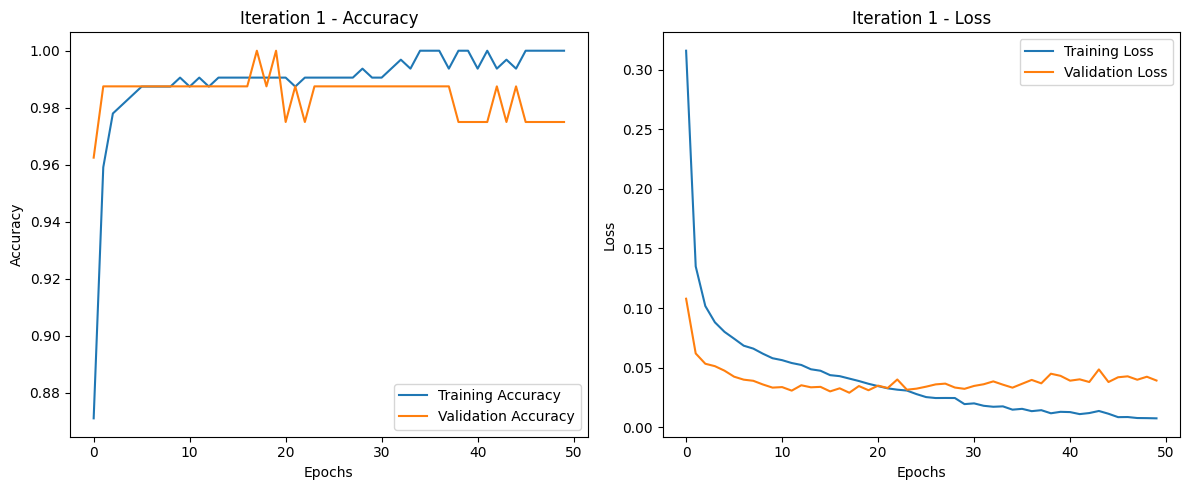

Iteration 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


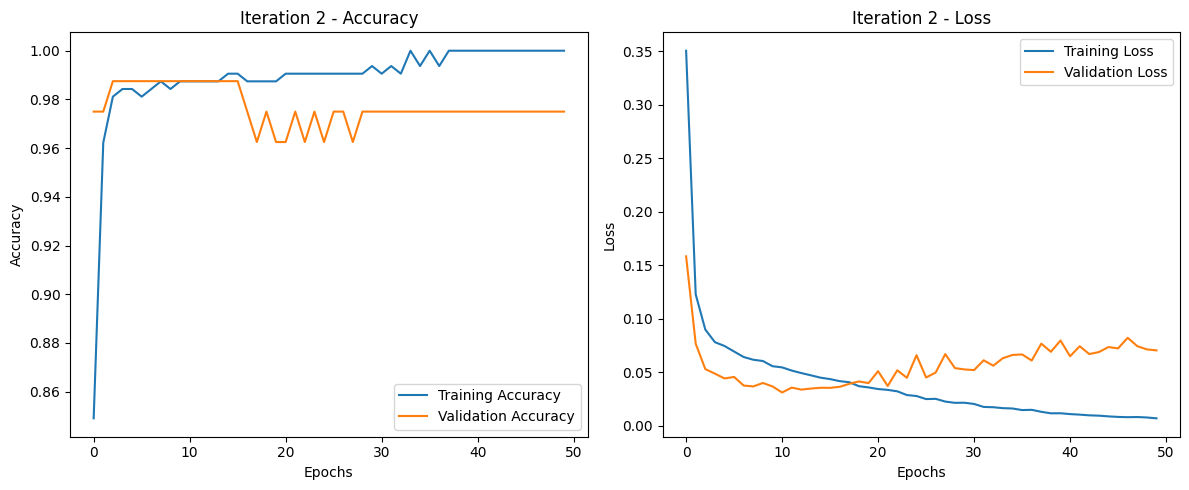

Iteration 3/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


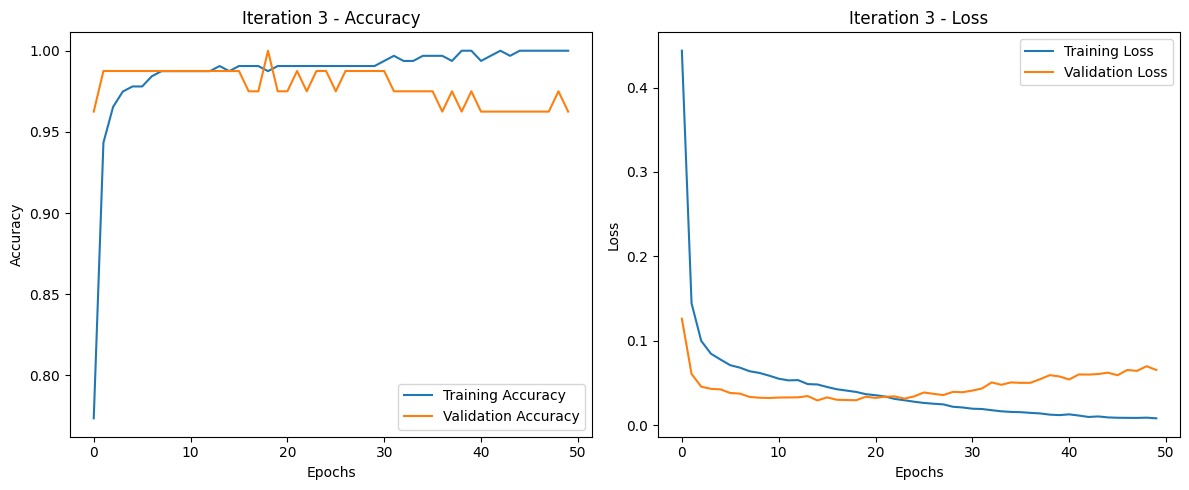


Average Classification Report:
0:
  precision: 0.9638
  recall: 0.9688
  f1-score: 0.9662
  support: 64.0000
1:
  precision: 0.9812
  recall: 0.9782
  f1-score: 0.9797
  support: 107.0000
accuracy: 0.9747
macro avg:
  precision: 0.9725
  recall: 0.9735
  f1-score: 0.9730
  support: 171.0000
weighted avg:
  precision: 0.9747
  recall: 0.9747
  f1-score: 0.9747
  support: 171.0000


In [ ]:
def piecewise_activation(x):
    return tf.where(x > 0, x, tf.keras.activations.elu(x))

class PiecewiseActivation(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PiecewiseActivation, self).__init__(**kwargs)

    def call(self, inputs):
        return piecewise_activation(inputs)

# Load and preprocess the Iris dataset
iris_data = load_breast_cancer()
X_iris, y_iris = iris_data.data, iris_data.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = preprocess_data(X_iris, y_iris)

# Step 3: Build the model
def create_model(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation=PiecewiseActivation(), input_shape=(input_dim,)),
        tf.keras.layers.Dense(32, activation=PiecewiseActivation()),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and evaluate
def train_and_evaluate(num_iterations=3):
    reports = []
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        model = create_model(X_train_iris.shape[1], y_train_iris.shape[1])
        history = model.fit(
            X_train_iris, y_train_iris, epochs=50, batch_size=16, verbose=0, validation_split=0.2
        )

        # Evaluate
        predictions = model.predict(X_test_iris)
        y_test_labels = np.argmax(y_test_iris, axis=1)
        y_pred_labels = np.argmax(predictions, axis=1)

        # Collect classification report
        report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
        reports.append(report)

        # Plot training and validation accuracy for this iteration
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Iteration {iteration + 1} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training and validation loss for this iteration
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Iteration {iteration + 1} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Average classification report
    avg_report = {}
    for key in reports[0]:
        if isinstance(reports[0][key], dict):  # For class-specific metrics
            avg_report[key] = {
                metric: np.mean([r[key][metric] for r in reports if key in r and metric in r[key]])
                for metric in reports[0][key]
            }
        else:  # For overall metrics (e.g., 'accuracy')
            avg_report[key] = np.mean([r[key] for r in reports if key in r])

    print("\nAverage Classification Report:")
    for key, metrics in avg_report.items():
        if isinstance(metrics, dict):
            print(f"{key}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")
        else:
            print(f"{key}: {metrics:.4f}")

# Run the evaluation
train_and_evaluate()